## M2 skill using RNN model outputs
This data comes from /scratch/XXXXXXX/data/BBN/features/M2/aug_img_perc0.8_NEW-YOLO_weighted_loss
It has two types of files per video. One with features <video_id>-features.npz  and the other with labels (originals and predicted ones) <video_id>-window_label.npz
Labels contain the following keys: ['frame_idx', 'label', 'label_desc', 'label_pred', 'label_pred_desc'] 
Features contain the following keys: ['action', 'frame', 'object', 'sound', 'action_proj', 'frame_proj', 'obj_proj', 'img_comb', 'img_proj', 'sound_proj', 'feature_concat', 'gru_feature']

In [2]:
import numpy as np
import math

user_path = "/Users/soniacq/PTG/BBN_data/models/M2/"
# scp -r scqXXX@greene.hpc.nyu.edu:/scratch/XXXXXXX/data/BBN/features/M2/aug_img_perc0.8_NEW-YOLO_weighted_loss .
path_original_data = user_path # + 'BBN_data/RNN/aug_img_perc0.8_NEW-YOLO_weighted_loss/'
# Load the .npy file with allow_pickle=True
features_M2_1 = np.load(path_original_data + '3_tourns_1-features.npz', allow_pickle=True)

# Load the .npy file with allow_pickle=True
# labels_M2_1 = np.load(path_original_data + '3_tourns_2-window_label.npz', allow_pickle=True)

In [4]:
# Get the keys and convert them to a list
keys = list(features_M2_1.keys())
# Print the keys
print(keys)
# # Get the keys and convert them to a list
# keys_labels = list(labels_M2_1.keys())
# # Print the keys
# print(keys_labels)

['fps', 'window_limit', 'omnivore', 'slowfast', 'avion', 'objects_conf', 'objects_bbox', 'hls_l_avg']


In [5]:
omnivore_features = features_M2_1['omnivore']
print(features_M2_1['omnivore'].shape)
print(features_M2_1['slowfast'].shape)
print(features_M2_1['avion'].shape)

# array_labels = labels_M2_1['label_desc']
# print(len(array_labels))

(134, 1024)
(134, 1600)
(134, 3806)


In [19]:
print(features_M2_1['objects_bbox'])

[array([], shape=(0, 4), dtype=float32)
 array([[0.32597724, 0.00365482, 0.61426157, 0.98386675]], dtype=float32)
 array([], shape=(0, 4), dtype=float32)
 array([[0.        , 0.13398448, 0.15358046, 0.713335  ]], dtype=float32)
 array([], shape=(0, 4), dtype=float32)
 array([[0.6168215 , 0.51035357, 0.83551145, 0.9989238 ],
        [0.        , 0.10519207, 0.16736   , 0.89545107]], dtype=float32)
 array([[0.79135054, 0.00113903, 0.96226096, 0.5718413 ]], dtype=float32)
 array([[0.7900375 , 0.18268773, 0.9996328 , 0.79704696]], dtype=float32)
 array([[0.10993206, 0.00228907, 0.4853017 , 0.6041923 ],
        [0.19054829, 0.        , 0.63923484, 0.6818377 ]], dtype=float32)
 array([], shape=(0, 4), dtype=float32)
 array([], shape=(0, 4), dtype=float32)
 array([], shape=(0, 4), dtype=float32)
 array([], shape=(0, 4), dtype=float32)
 array([], shape=(0, 4), dtype=float32)
 array([], shape=(0, 4), dtype=float32)
 array([], shape=(0, 4), dtype=float32)
 array([], shape=(0, 4), dtype=float32)


In [6]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def plot_TSNE(labels, features, title, save_fig = False):

    # 1. Data Preprocessing (Standardization)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(features)
    # Assuming your data is stored in a variable named 'data'
    # data should be a 2D NumPy array with shape (n_instances, n_features)
    
    # 2. t-SNE
    tsne = TSNE(n_components=2, random_state=42)  # We want to keep 2 components for 2D visualization
    tsne_components = tsne.fit_transform(data_scaled)
    
    # 3. Plotting
    plt.figure(figsize=(8, 6))
    # for label in np.unique(labels):
    #     plt.scatter(tsne_components[labels == label, 0],
    #                 tsne_components[labels == label, 1],
    #                 label=f'Label {label}')
    plt.scatter(tsne_components[:, 0], tsne_components[:, 1], alpha=0.5)
    plt.title('t-SNE for ' + title)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.grid(True, alpha=0.07, color='gray')  # Adjust transparency and color of grid lines
    plt.legend(loc='upper right', bbox_to_anchor=(2.2, 1))
    # Save the plot as a PNG file
    if(save_fig):
        plt.savefig(title+ '.png')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


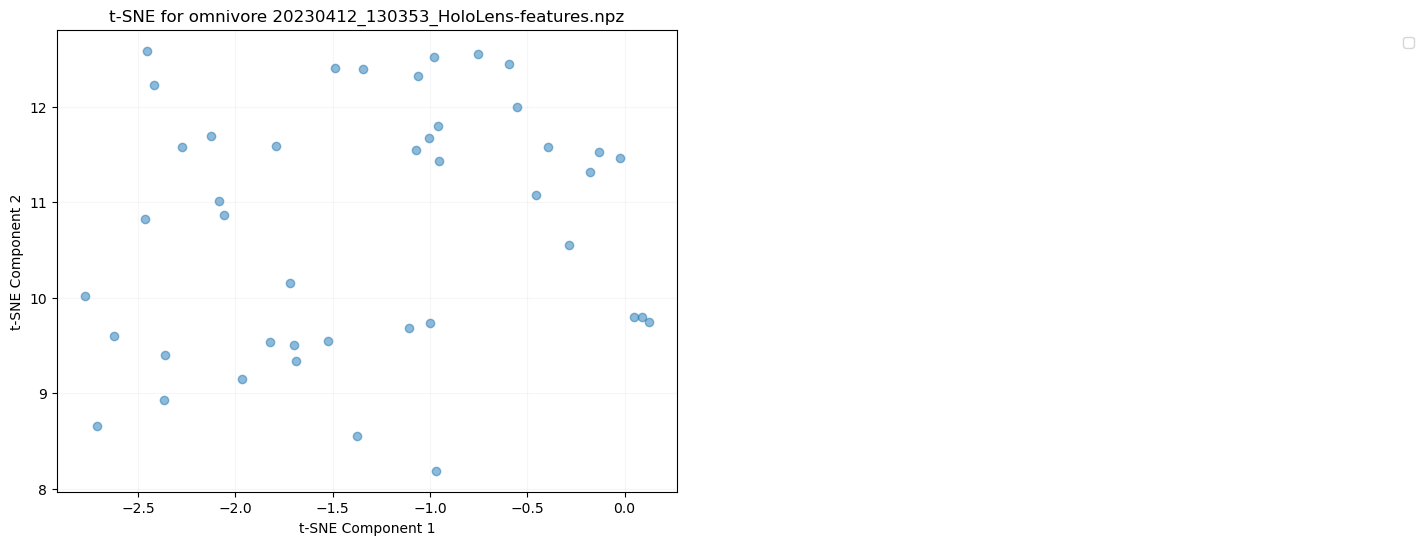

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


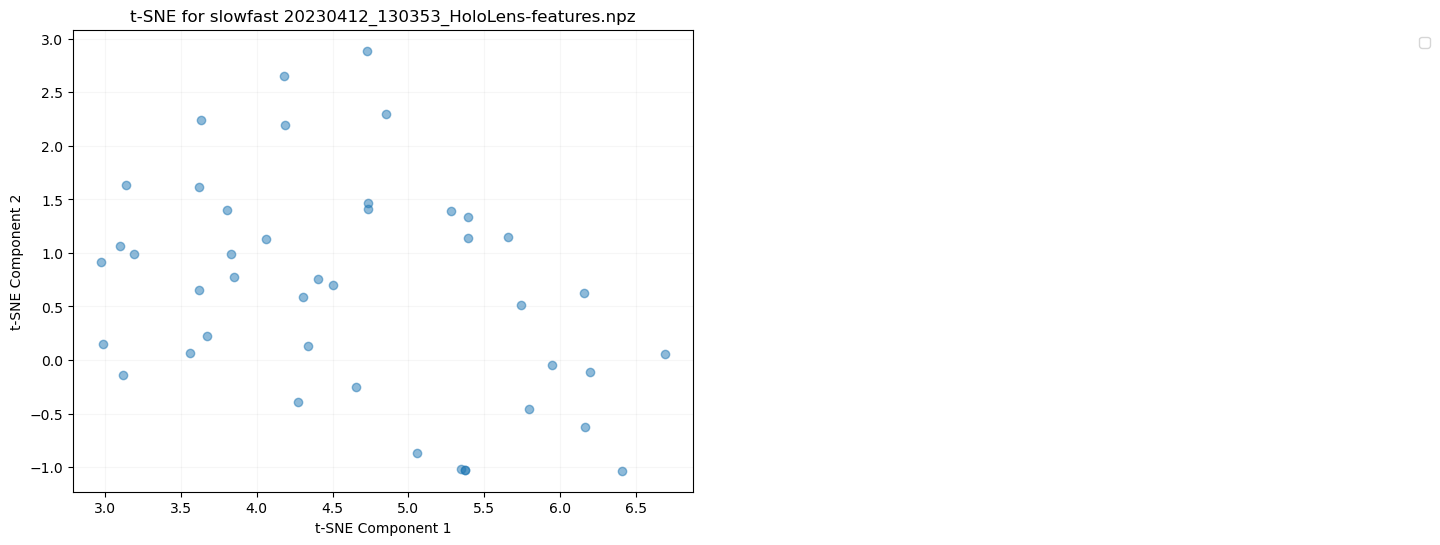

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


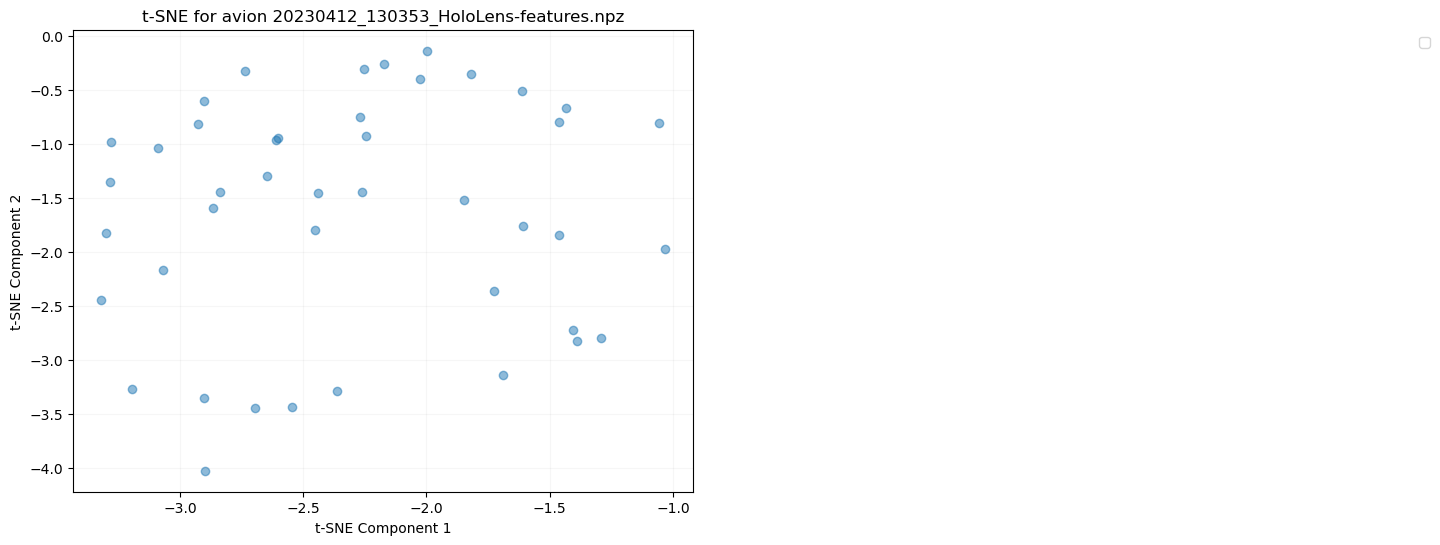

File: 20230412_130353_HoloLens-features.npz, Array (fps): ()
File: 20230412_130353_HoloLens-features.npz, Array (window_limit): (43, 2)
File: 20230412_130353_HoloLens-features.npz, Array (omnivore): (43, 1024)
File: 20230412_130353_HoloLens-features.npz, Array (slowfast): (43, 1600)
File: 20230412_130353_HoloLens-features.npz, Array (avion): (43, 3806)


ValueError: Object arrays cannot be loaded when allow_pickle=False

In [7]:
import os
import numpy as np

# Specify the folder where your files are located
folder_path = user_path

# List all files in the folder
files = os.listdir(folder_path)

# Loop through each file
for file_name in files:
    # Check if the file is an npz file
    if file_name.endswith('.npz'):
        file_path = os.path.join(folder_path, file_name)
        
        # Load the content of the npz file
        data = np.load(file_path)

        plot_TSNE([], data['omnivore'], "omnivore " + file_name)
        plot_TSNE([], data['slowfast'], "slowfast "+ file_name)
        plot_TSNE([], data['avion'], "avion " + file_name)
        # Assuming your npz file contains arrays, you can access them by keys
        for key in data.keys():
            array = data[key]
            # Do something with the array, for example print its shape
            print(f"File: {file_name}, Array ({key}): {array.shape}")


## Using HLS. Dots are color coded based on HLS

In [16]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

def plot_TSNE_hls(labels, features, title, hls_l_avg, save_fig=False):
    # 1. Data Preprocessing (Standardization)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(features)
    
    # 2. t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_components = tsne.fit_transform(data_scaled)
    
    # 3. Normalize the hls_l_avg values
    norm = plt.Normalize(vmin=np.min(hls_l_avg), vmax=np.max(hls_l_avg))
    colors = plt.cm.viridis(norm(hls_l_avg))  # You can use other colormaps as well

    # 4. Plotting
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=colors, alpha=0.5)
    
    plt.title('t-SNE for ' + title)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.grid(True, alpha=0.07, color='gray')
    
    # Create a colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('HLS Luminance Average')

    # Save the plot as a PNG file
    if save_fig:
        plt.savefig(title + '.png')
    plt.show()


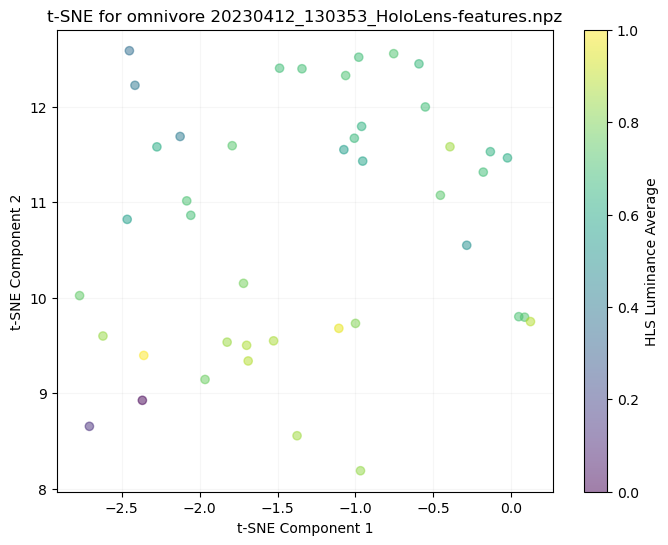

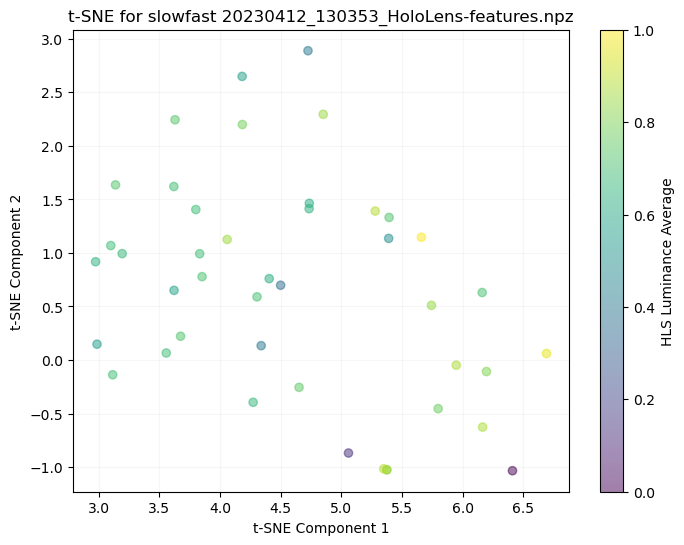

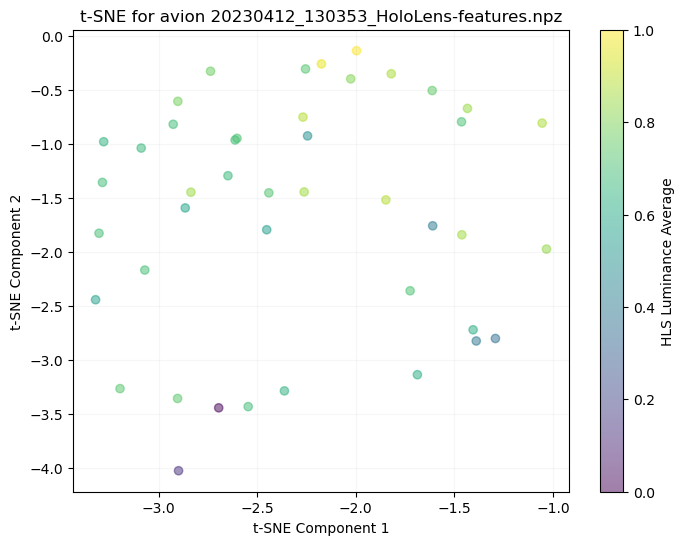

File: 20230412_130353_HoloLens-features.npz, Array (fps): ()
File: 20230412_130353_HoloLens-features.npz, Array (window_limit): (43, 2)
File: 20230412_130353_HoloLens-features.npz, Array (omnivore): (43, 1024)
File: 20230412_130353_HoloLens-features.npz, Array (slowfast): (43, 1600)
File: 20230412_130353_HoloLens-features.npz, Array (avion): (43, 3806)
File: 20230412_130353_HoloLens-features.npz, Array (objects_conf): (43,)
File: 20230412_130353_HoloLens-features.npz, Array (objects_bbox): (43,)
File: 20230412_130353_HoloLens-features.npz, Array (hls_l_avg): (43,)


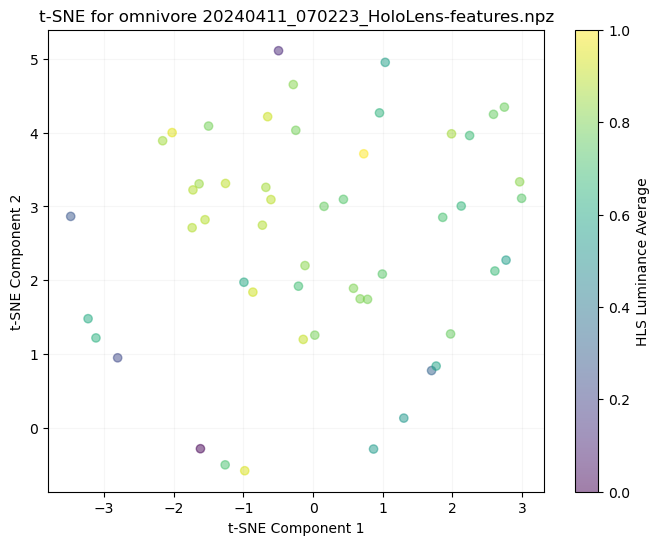

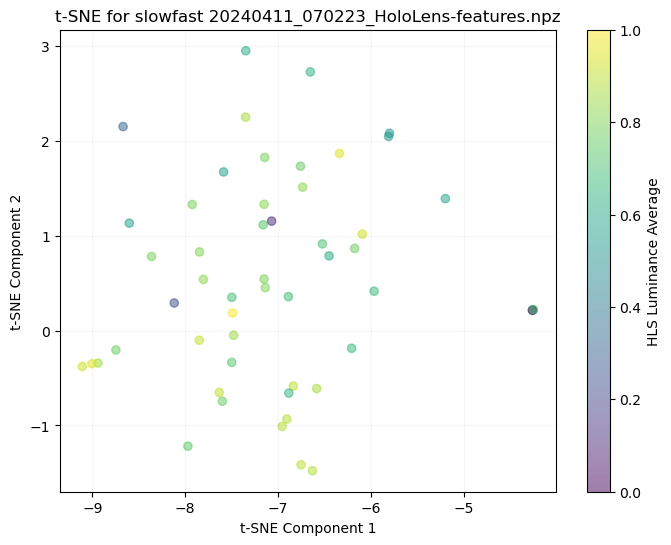

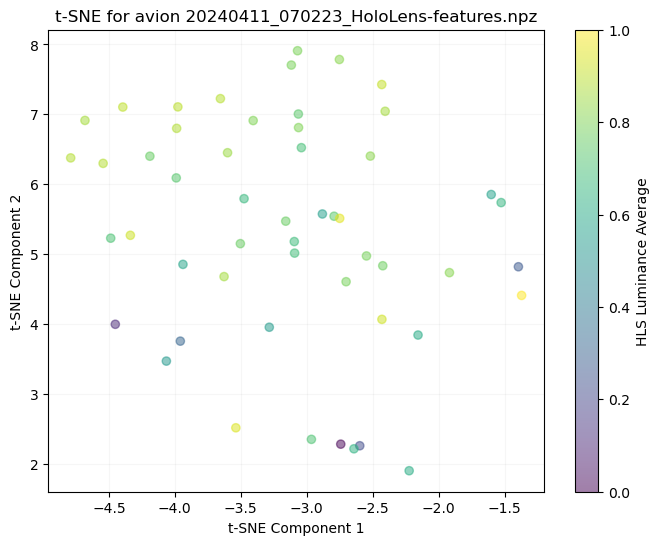

File: 20240411_070223_HoloLens-features.npz, Array (fps): ()
File: 20240411_070223_HoloLens-features.npz, Array (window_limit): (52, 2)
File: 20240411_070223_HoloLens-features.npz, Array (omnivore): (52, 1024)
File: 20240411_070223_HoloLens-features.npz, Array (slowfast): (52, 1600)
File: 20240411_070223_HoloLens-features.npz, Array (avion): (52, 3806)
File: 20240411_070223_HoloLens-features.npz, Array (objects_conf): (52,)
File: 20240411_070223_HoloLens-features.npz, Array (objects_bbox): (52,)
File: 20240411_070223_HoloLens-features.npz, Array (hls_l_avg): (52,)


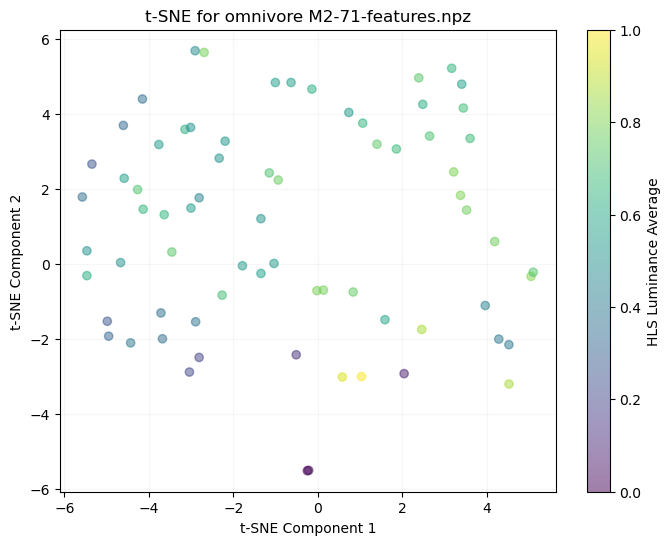

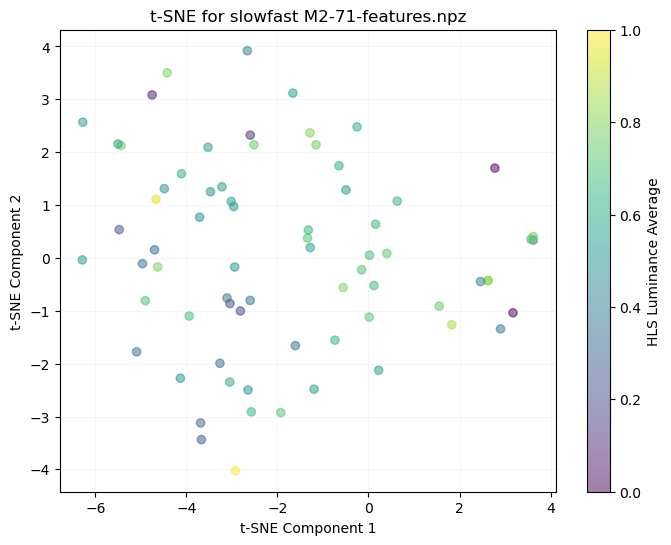

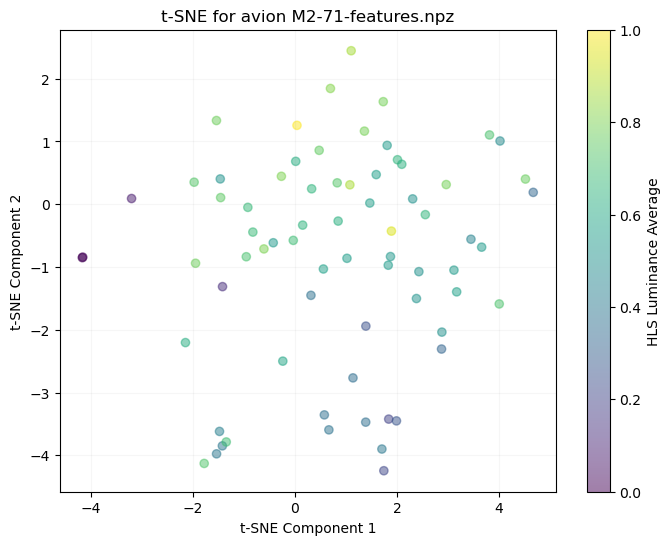

File: M2-71-features.npz, Array (fps): ()
File: M2-71-features.npz, Array (window_limit): (71, 2)
File: M2-71-features.npz, Array (omnivore): (71, 1024)
File: M2-71-features.npz, Array (slowfast): (71, 1600)
File: M2-71-features.npz, Array (avion): (71, 3806)
File: M2-71-features.npz, Array (objects_conf): (71,)
File: M2-71-features.npz, Array (objects_bbox): (71,)
File: M2-71-features.npz, Array (hls_l_avg): (71,)


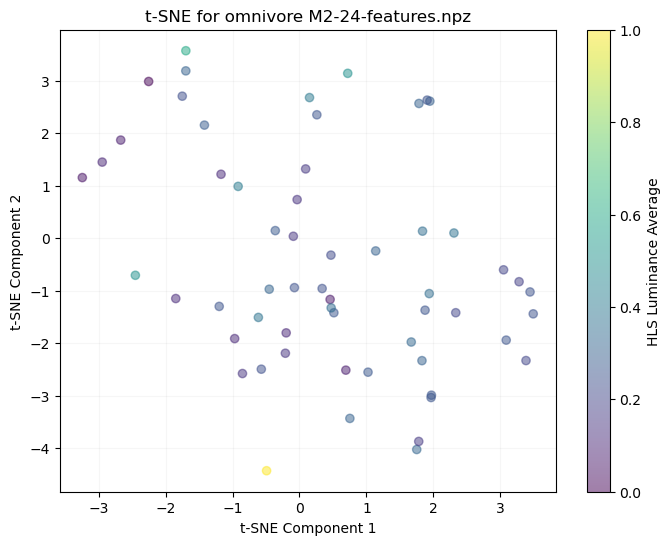

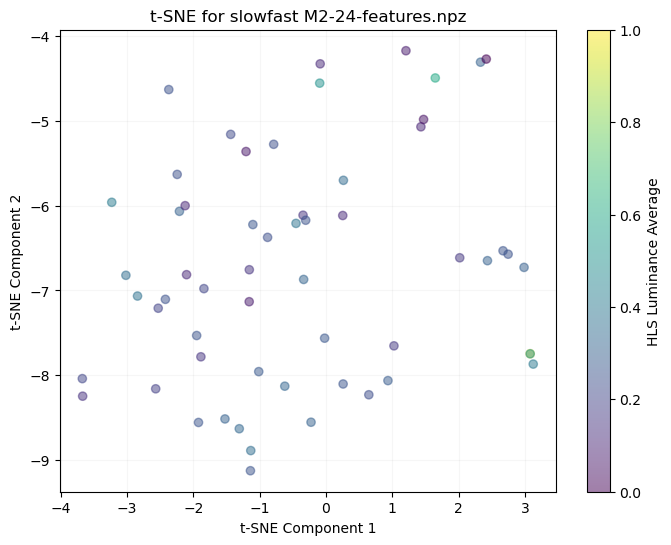

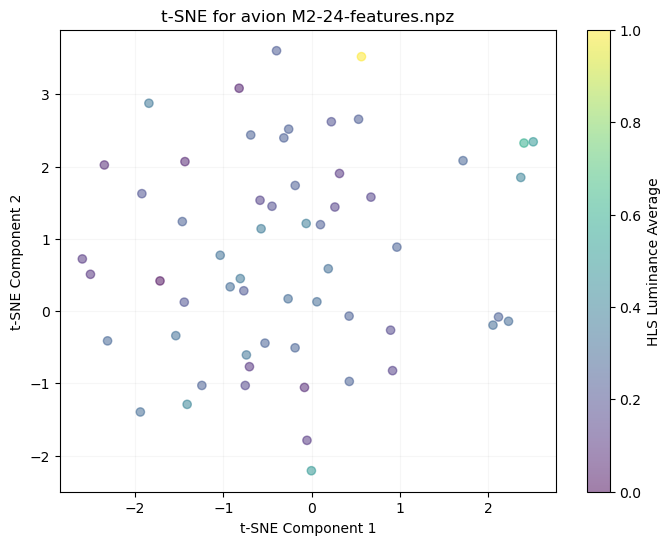

File: M2-24-features.npz, Array (fps): ()
File: M2-24-features.npz, Array (window_limit): (58, 2)
File: M2-24-features.npz, Array (omnivore): (58, 1024)
File: M2-24-features.npz, Array (slowfast): (58, 1600)
File: M2-24-features.npz, Array (avion): (58, 3806)
File: M2-24-features.npz, Array (objects_conf): (58,)
File: M2-24-features.npz, Array (objects_bbox): (58,)
File: M2-24-features.npz, Array (hls_l_avg): (58,)


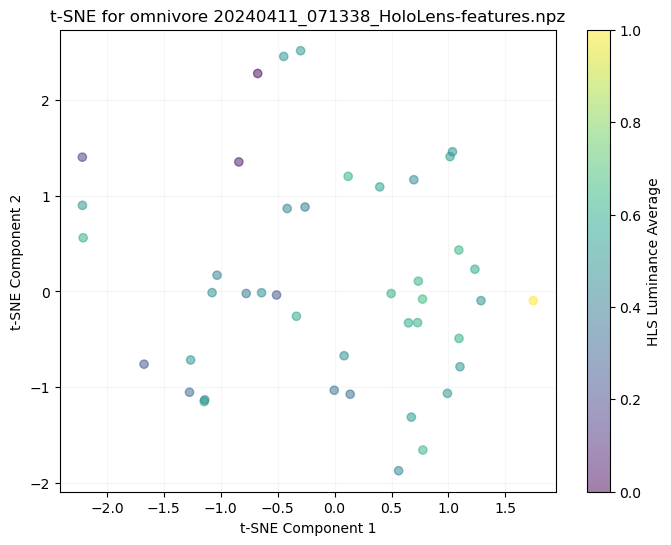

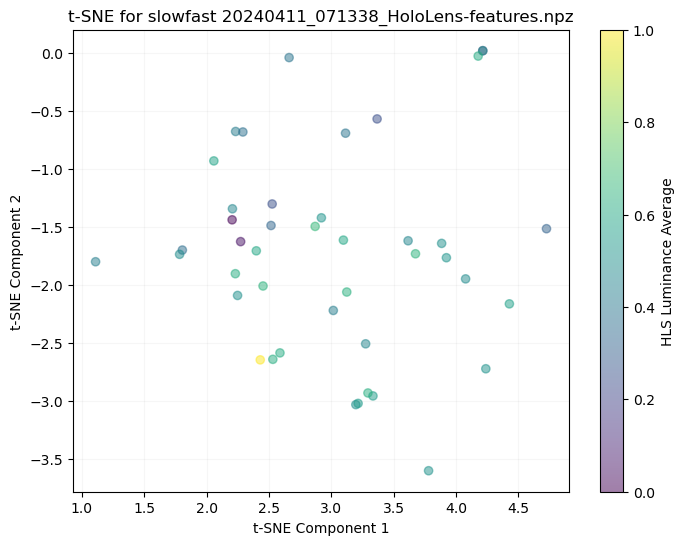

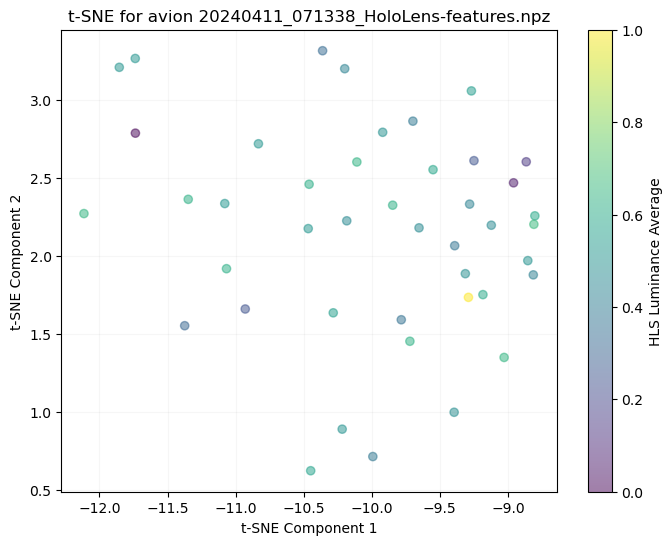

File: 20240411_071338_HoloLens-features.npz, Array (fps): ()
File: 20240411_071338_HoloLens-features.npz, Array (window_limit): (43, 2)
File: 20240411_071338_HoloLens-features.npz, Array (omnivore): (43, 1024)
File: 20240411_071338_HoloLens-features.npz, Array (slowfast): (43, 1600)
File: 20240411_071338_HoloLens-features.npz, Array (avion): (43, 3806)
File: 20240411_071338_HoloLens-features.npz, Array (objects_conf): (43,)
File: 20240411_071338_HoloLens-features.npz, Array (objects_bbox): (43,)
File: 20240411_071338_HoloLens-features.npz, Array (hls_l_avg): (43,)


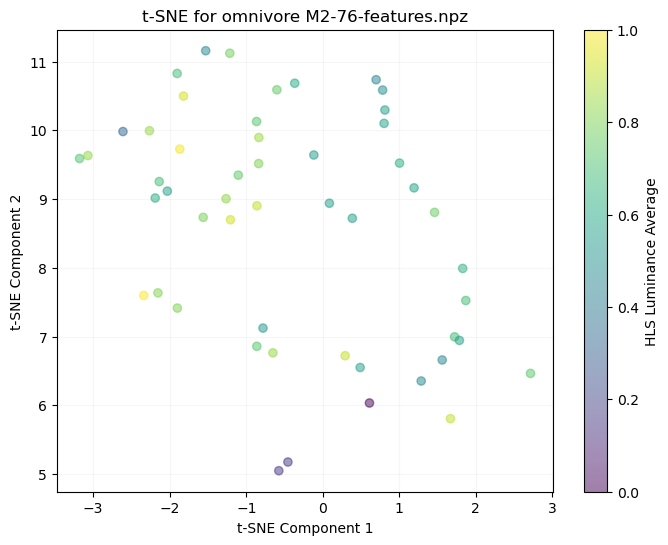

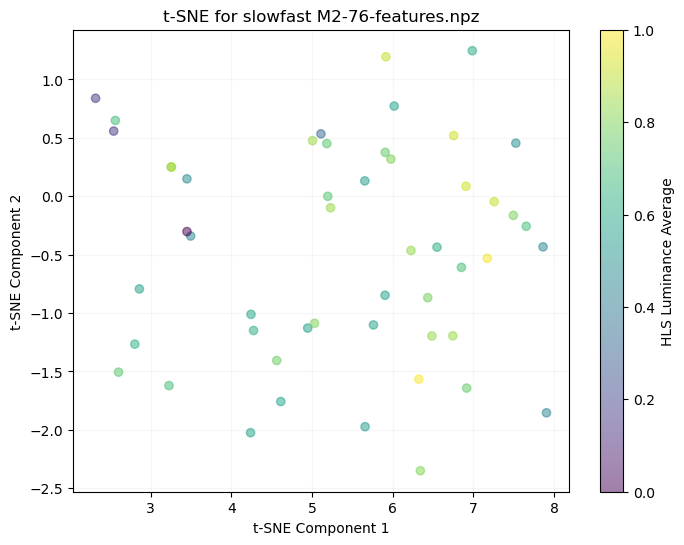

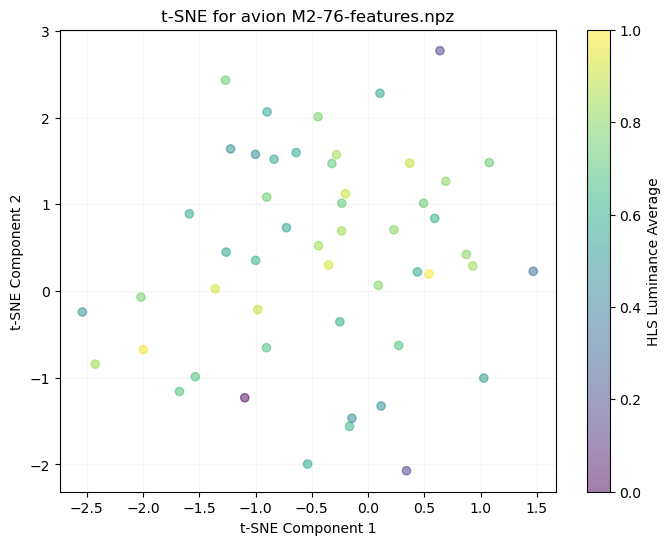

File: M2-76-features.npz, Array (fps): ()
File: M2-76-features.npz, Array (window_limit): (51, 2)
File: M2-76-features.npz, Array (omnivore): (51, 1024)
File: M2-76-features.npz, Array (slowfast): (51, 1600)
File: M2-76-features.npz, Array (avion): (51, 3806)
File: M2-76-features.npz, Array (objects_conf): (51,)
File: M2-76-features.npz, Array (objects_bbox): (51,)
File: M2-76-features.npz, Array (hls_l_avg): (51,)


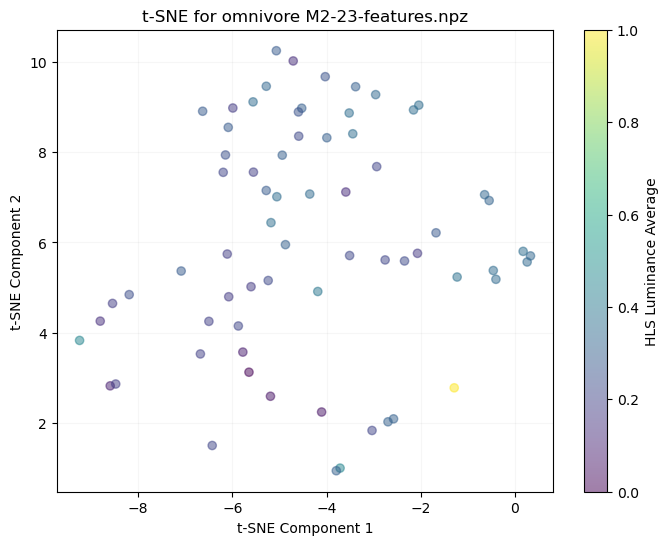

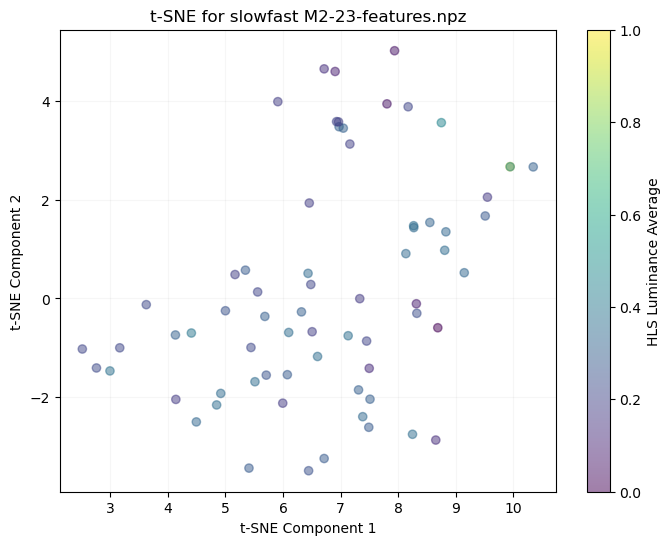

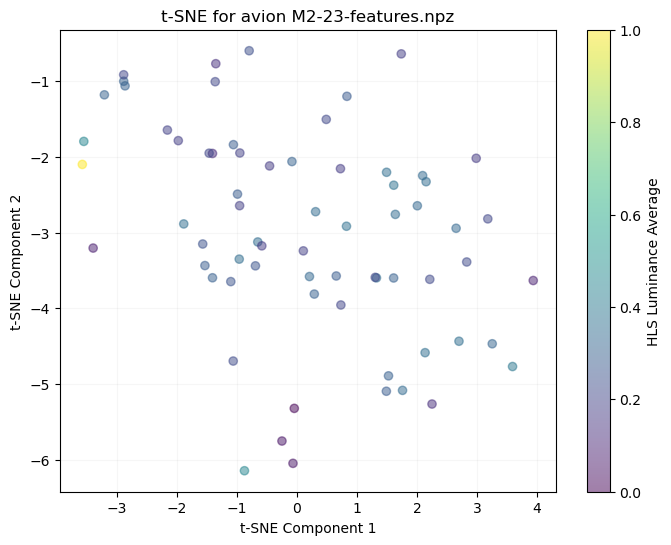

File: M2-23-features.npz, Array (fps): ()
File: M2-23-features.npz, Array (window_limit): (68, 2)
File: M2-23-features.npz, Array (omnivore): (68, 1024)
File: M2-23-features.npz, Array (slowfast): (68, 1600)
File: M2-23-features.npz, Array (avion): (68, 3806)
File: M2-23-features.npz, Array (objects_conf): (68,)
File: M2-23-features.npz, Array (objects_bbox): (68,)
File: M2-23-features.npz, Array (hls_l_avg): (68,)


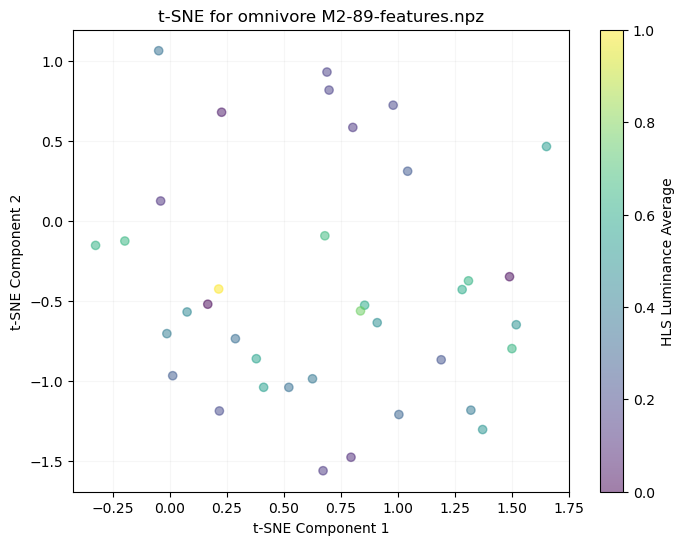

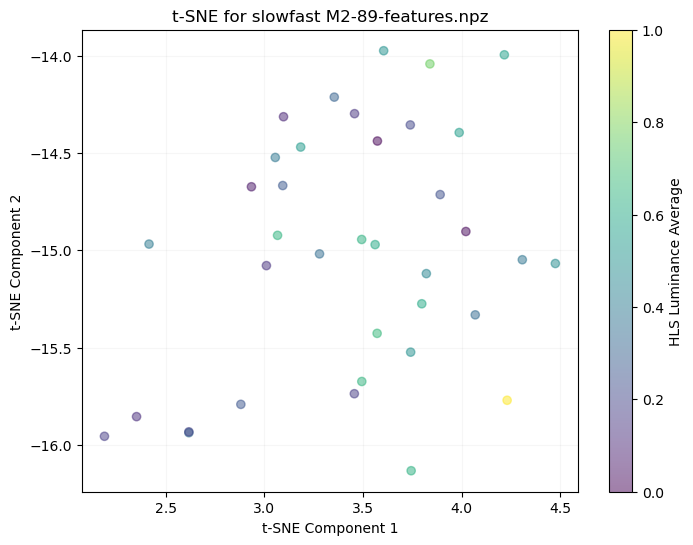

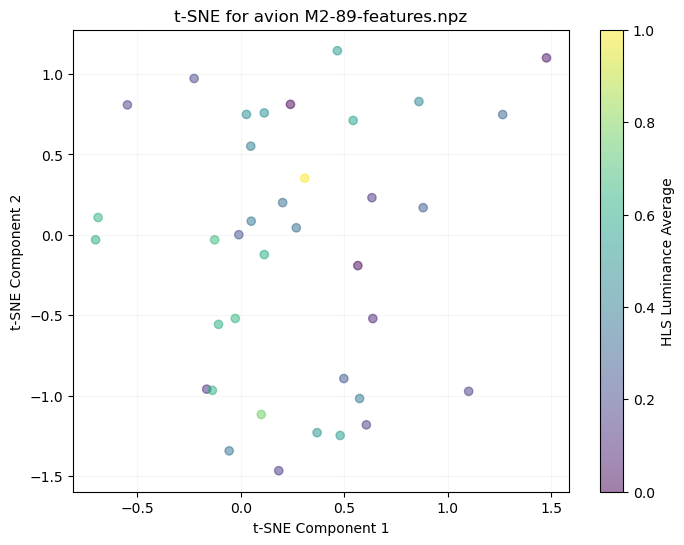

File: M2-89-features.npz, Array (fps): ()
File: M2-89-features.npz, Array (window_limit): (37, 2)
File: M2-89-features.npz, Array (omnivore): (37, 1024)
File: M2-89-features.npz, Array (slowfast): (37, 1600)
File: M2-89-features.npz, Array (avion): (37, 3806)
File: M2-89-features.npz, Array (objects_conf): (37,)
File: M2-89-features.npz, Array (objects_bbox): (37,)
File: M2-89-features.npz, Array (hls_l_avg): (37,)


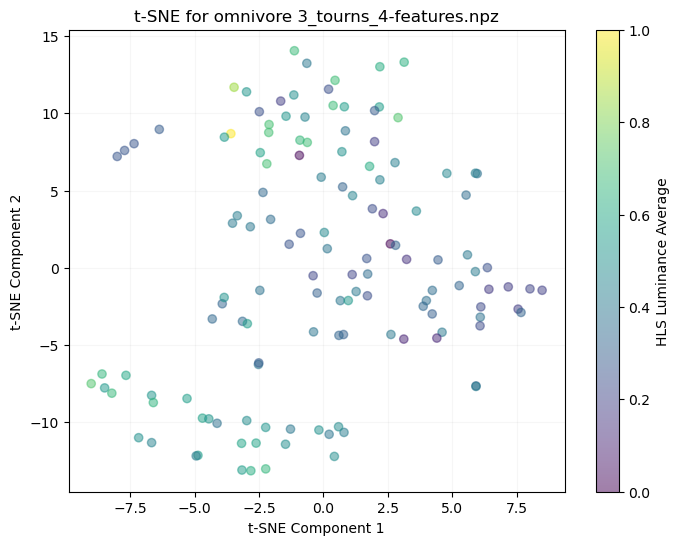

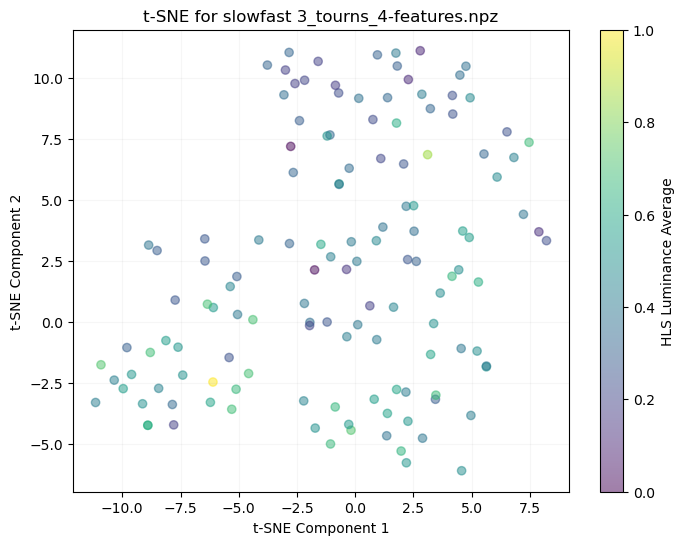

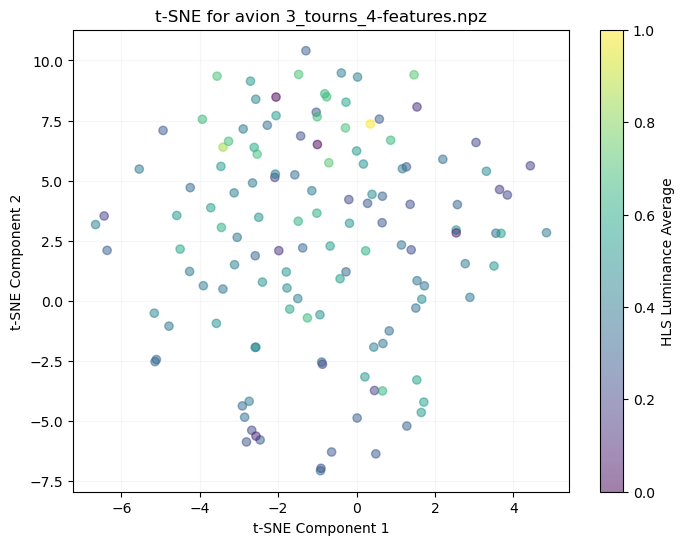

File: 3_tourns_4-features.npz, Array (fps): ()
File: 3_tourns_4-features.npz, Array (window_limit): (132, 2)
File: 3_tourns_4-features.npz, Array (omnivore): (132, 1024)
File: 3_tourns_4-features.npz, Array (slowfast): (132, 1600)
File: 3_tourns_4-features.npz, Array (avion): (132, 3806)
File: 3_tourns_4-features.npz, Array (objects_conf): (132,)
File: 3_tourns_4-features.npz, Array (objects_bbox): (132,)
File: 3_tourns_4-features.npz, Array (hls_l_avg): (132,)


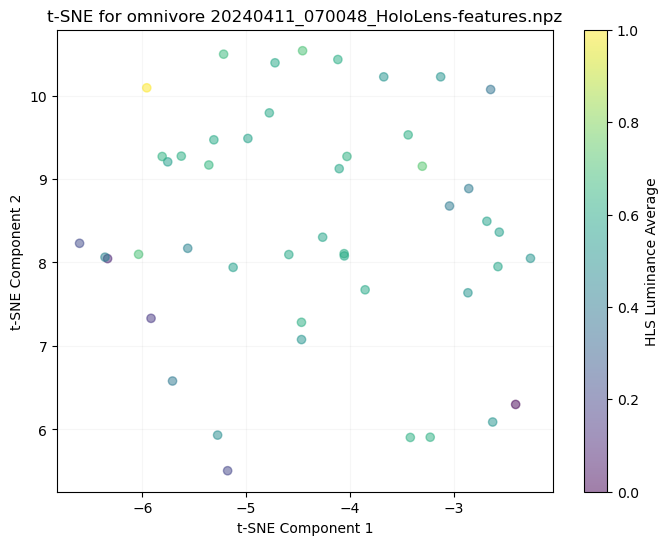

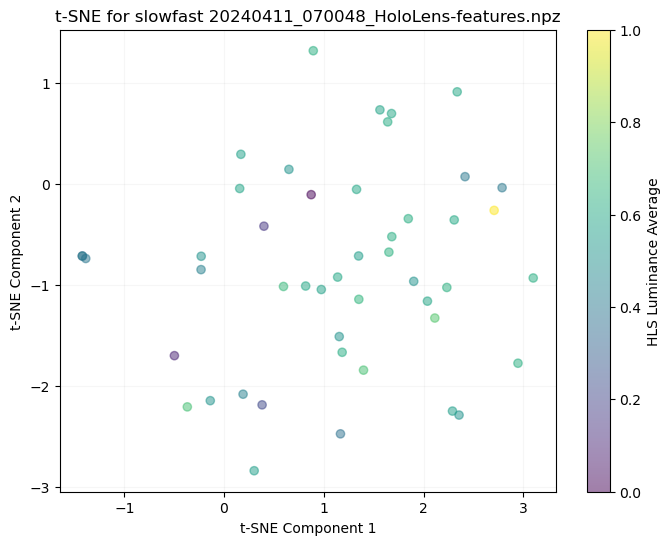

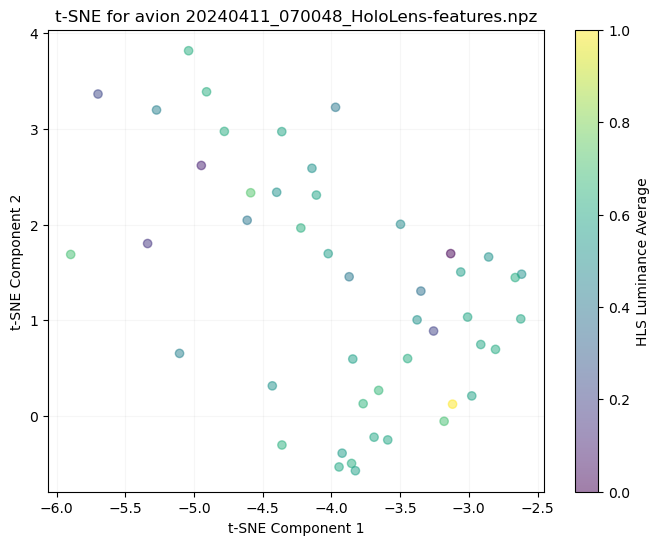

File: 20240411_070048_HoloLens-features.npz, Array (fps): ()
File: 20240411_070048_HoloLens-features.npz, Array (window_limit): (47, 2)
File: 20240411_070048_HoloLens-features.npz, Array (omnivore): (47, 1024)
File: 20240411_070048_HoloLens-features.npz, Array (slowfast): (47, 1600)
File: 20240411_070048_HoloLens-features.npz, Array (avion): (47, 3806)
File: 20240411_070048_HoloLens-features.npz, Array (objects_conf): (47,)
File: 20240411_070048_HoloLens-features.npz, Array (objects_bbox): (47,)
File: 20240411_070048_HoloLens-features.npz, Array (hls_l_avg): (47,)


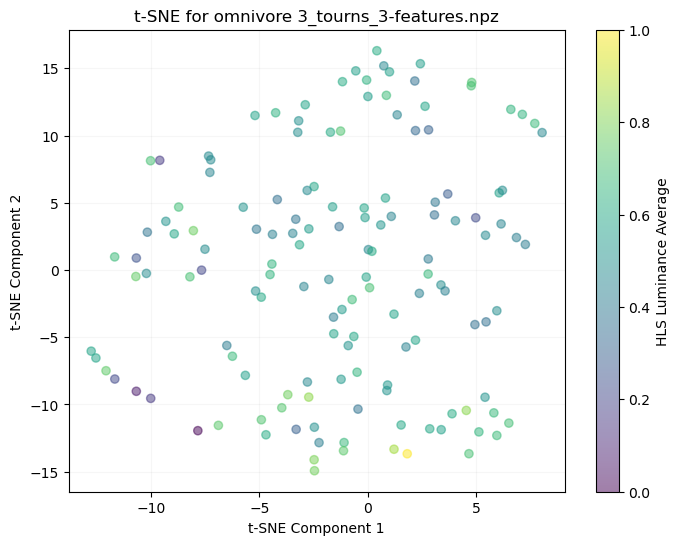

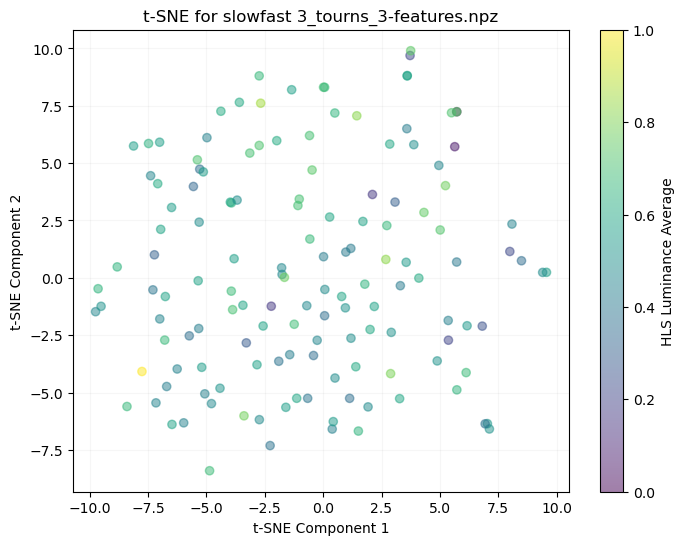

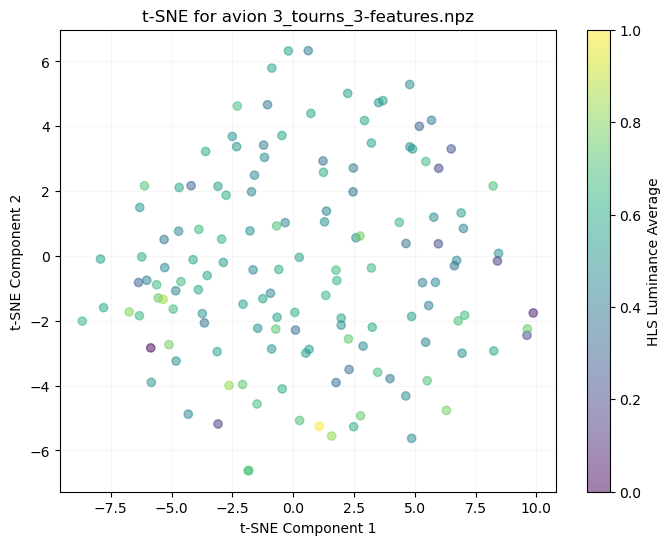

File: 3_tourns_3-features.npz, Array (fps): ()
File: 3_tourns_3-features.npz, Array (window_limit): (141, 2)
File: 3_tourns_3-features.npz, Array (omnivore): (141, 1024)
File: 3_tourns_3-features.npz, Array (slowfast): (141, 1600)
File: 3_tourns_3-features.npz, Array (avion): (141, 3806)
File: 3_tourns_3-features.npz, Array (objects_conf): (141,)
File: 3_tourns_3-features.npz, Array (objects_bbox): (141,)
File: 3_tourns_3-features.npz, Array (hls_l_avg): (141,)


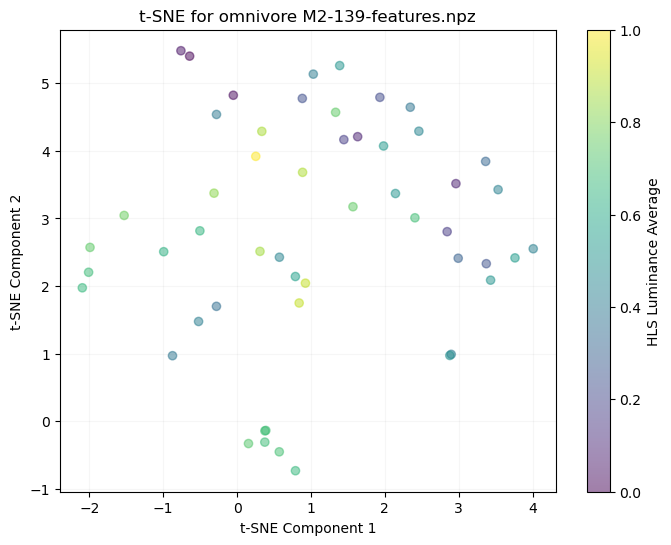

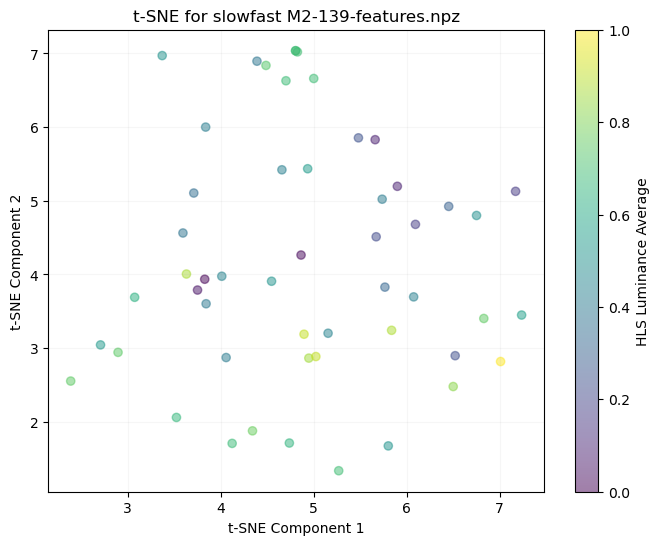

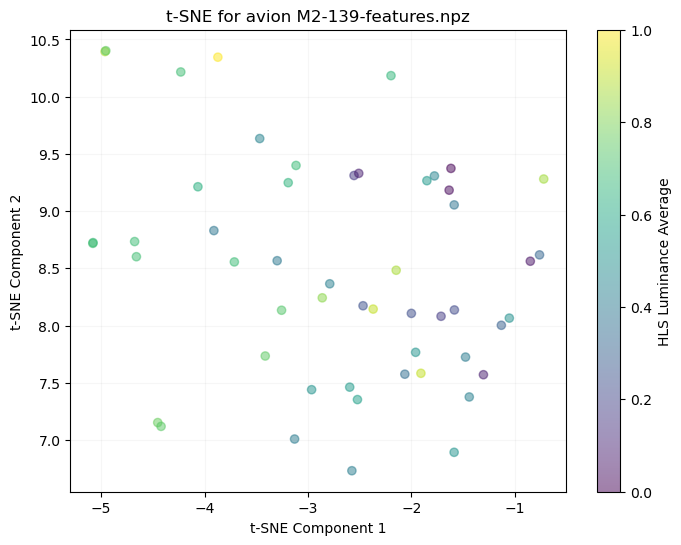

File: M2-139-features.npz, Array (fps): ()
File: M2-139-features.npz, Array (window_limit): (52, 2)
File: M2-139-features.npz, Array (omnivore): (52, 1024)
File: M2-139-features.npz, Array (slowfast): (52, 1600)
File: M2-139-features.npz, Array (avion): (52, 3806)
File: M2-139-features.npz, Array (objects_conf): (52,)
File: M2-139-features.npz, Array (objects_bbox): (52,)
File: M2-139-features.npz, Array (hls_l_avg): (52,)


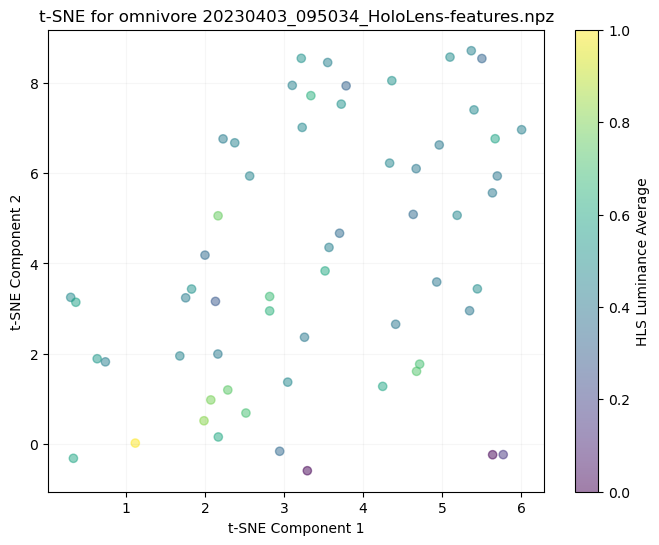

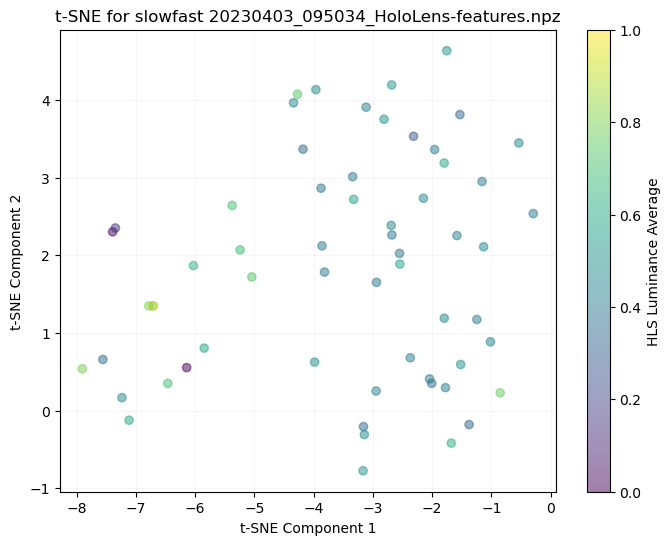

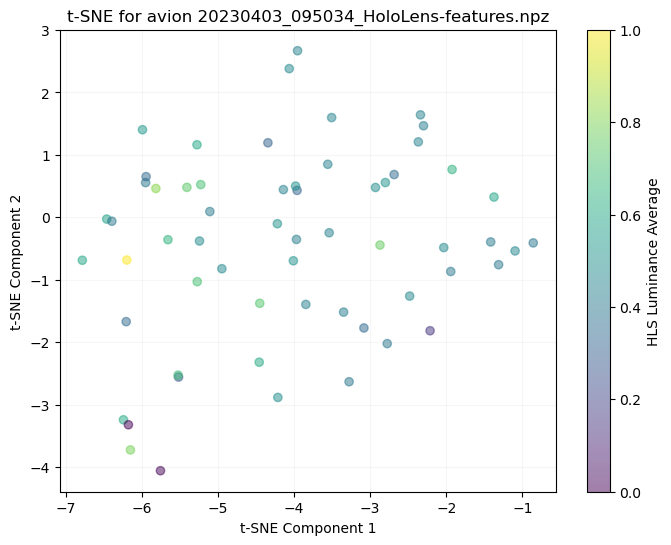

File: 20230403_095034_HoloLens-features.npz, Array (fps): ()
File: 20230403_095034_HoloLens-features.npz, Array (window_limit): (60, 2)
File: 20230403_095034_HoloLens-features.npz, Array (omnivore): (60, 1024)
File: 20230403_095034_HoloLens-features.npz, Array (slowfast): (60, 1600)
File: 20230403_095034_HoloLens-features.npz, Array (avion): (60, 3806)
File: 20230403_095034_HoloLens-features.npz, Array (objects_conf): (60,)
File: 20230403_095034_HoloLens-features.npz, Array (objects_bbox): (60,)
File: 20230403_095034_HoloLens-features.npz, Array (hls_l_avg): (60,)


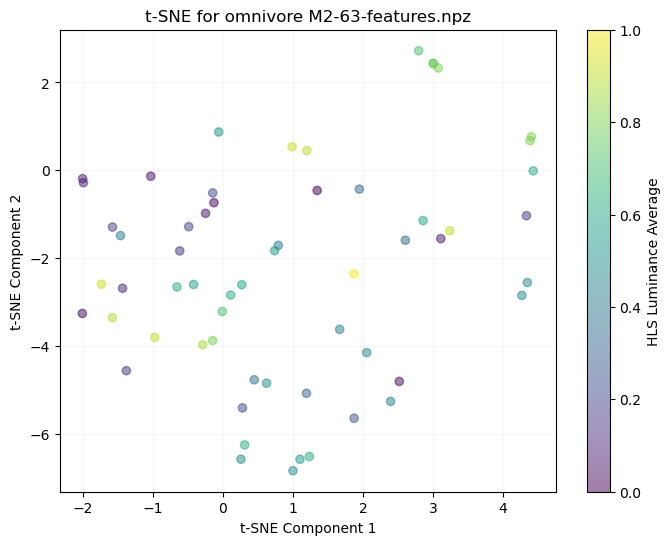

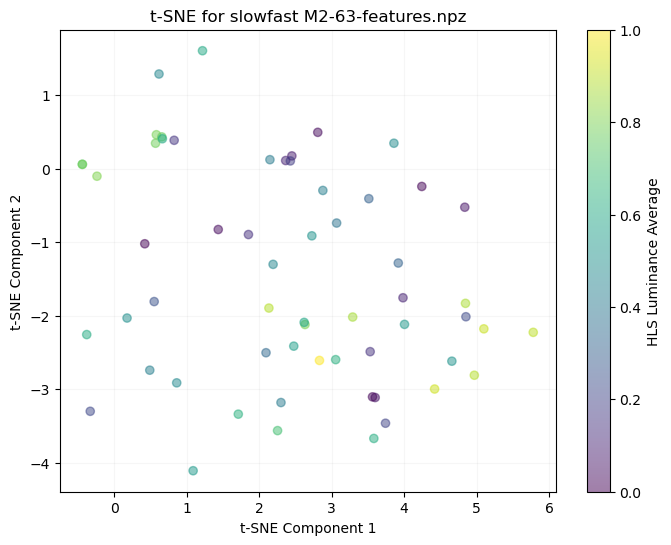

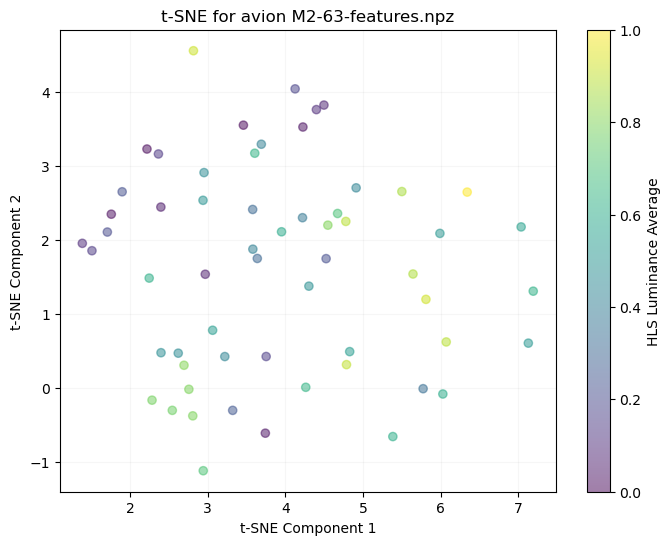

File: M2-63-features.npz, Array (fps): ()
File: M2-63-features.npz, Array (window_limit): (59, 2)
File: M2-63-features.npz, Array (omnivore): (59, 1024)
File: M2-63-features.npz, Array (slowfast): (59, 1600)
File: M2-63-features.npz, Array (avion): (59, 3806)
File: M2-63-features.npz, Array (objects_conf): (59,)
File: M2-63-features.npz, Array (objects_bbox): (59,)
File: M2-63-features.npz, Array (hls_l_avg): (59,)


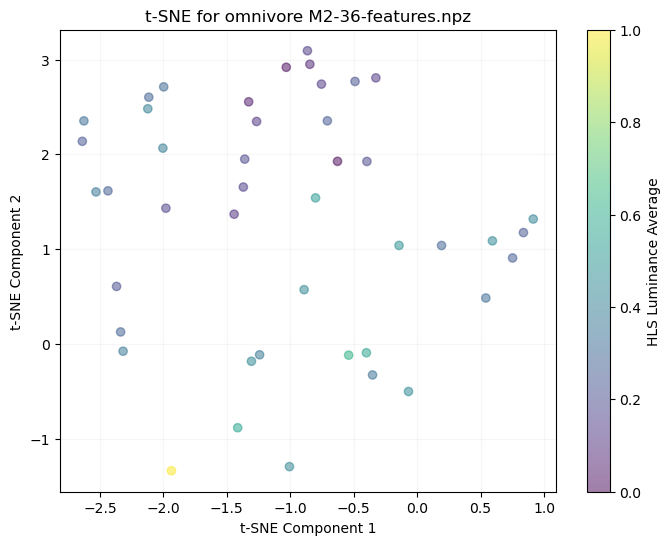

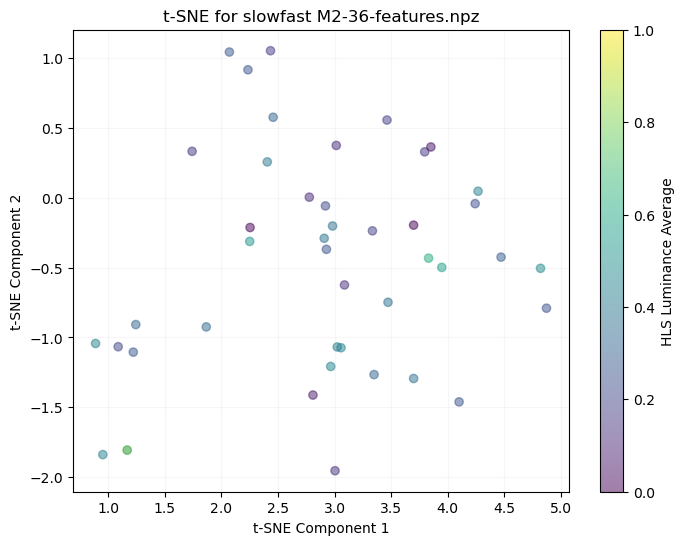

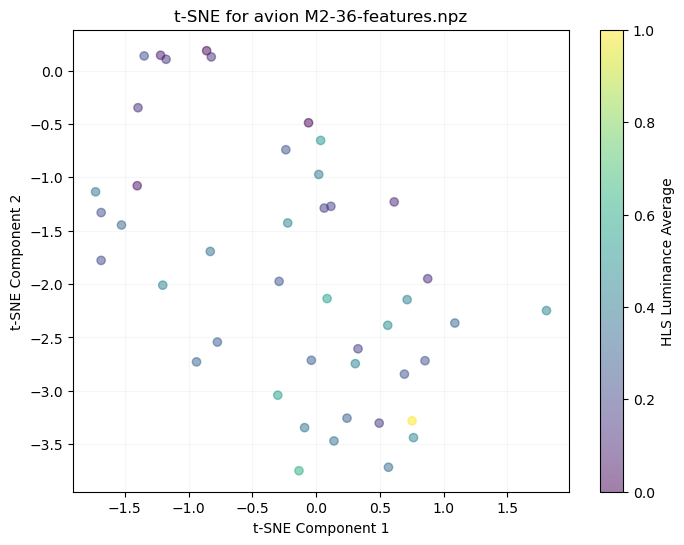

File: M2-36-features.npz, Array (fps): ()
File: M2-36-features.npz, Array (window_limit): (44, 2)
File: M2-36-features.npz, Array (omnivore): (44, 1024)
File: M2-36-features.npz, Array (slowfast): (44, 1600)
File: M2-36-features.npz, Array (avion): (44, 3806)
File: M2-36-features.npz, Array (objects_conf): (44,)
File: M2-36-features.npz, Array (objects_bbox): (44,)
File: M2-36-features.npz, Array (hls_l_avg): (44,)


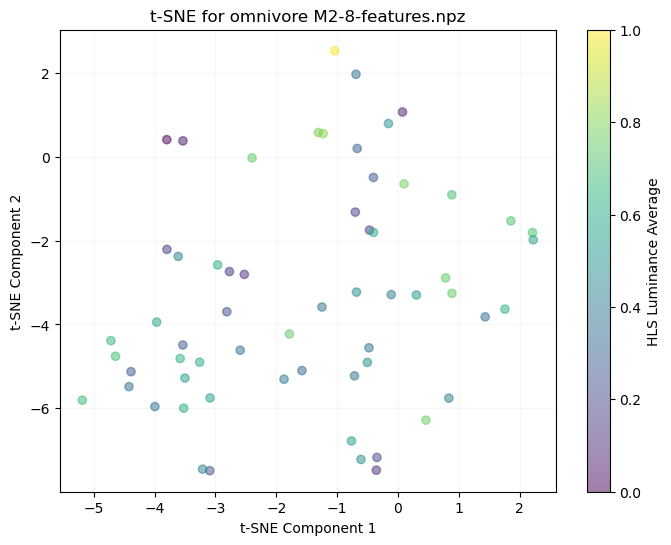

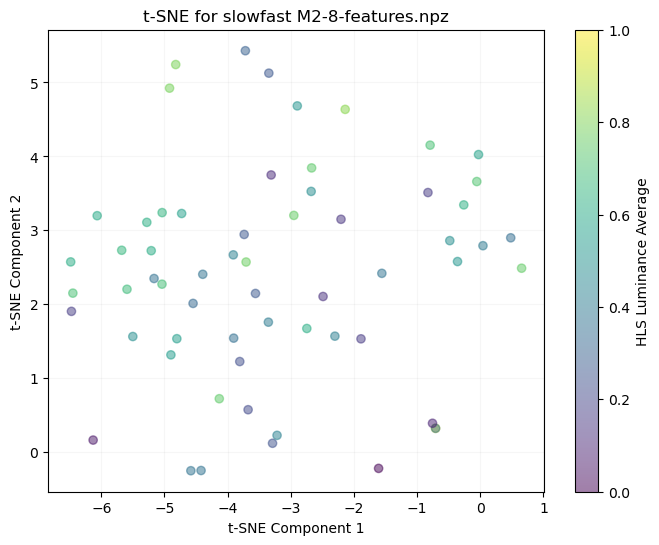

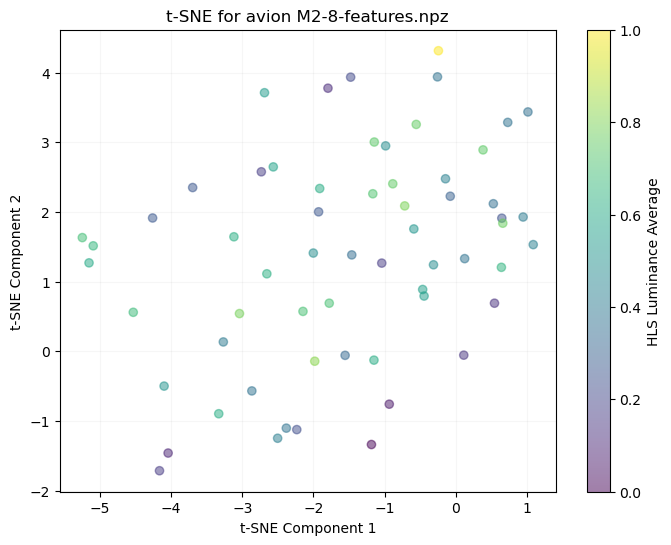

File: M2-8-features.npz, Array (fps): ()
File: M2-8-features.npz, Array (window_limit): (61, 2)
File: M2-8-features.npz, Array (omnivore): (61, 1024)
File: M2-8-features.npz, Array (slowfast): (61, 1600)
File: M2-8-features.npz, Array (avion): (61, 3806)
File: M2-8-features.npz, Array (objects_conf): (61,)
File: M2-8-features.npz, Array (objects_bbox): (61,)
File: M2-8-features.npz, Array (hls_l_avg): (61,)


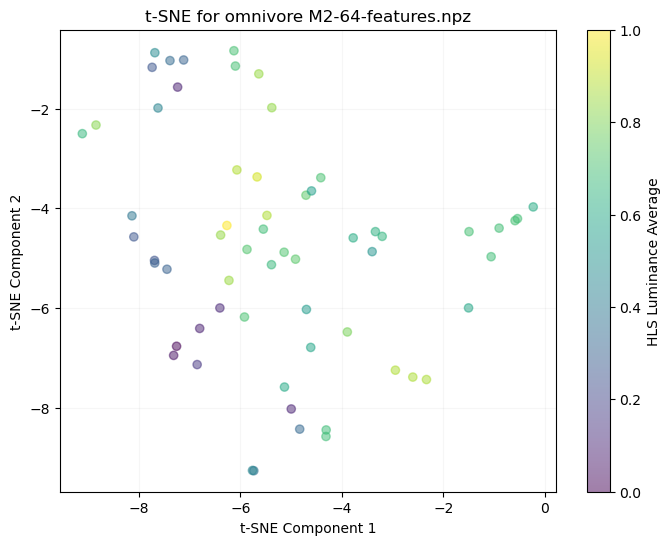

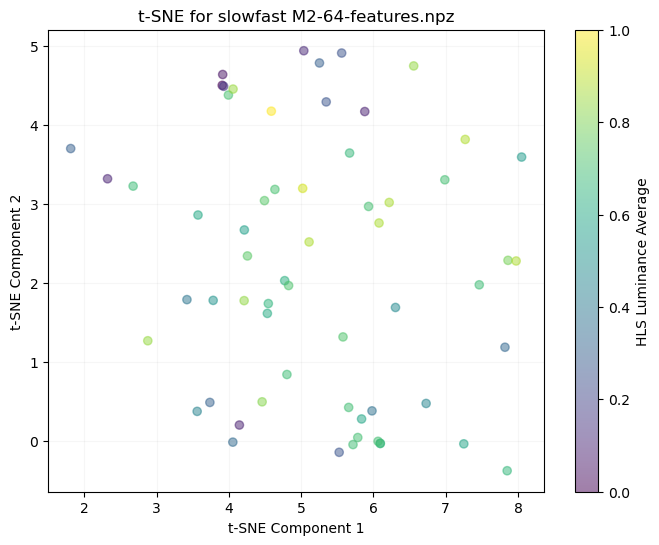

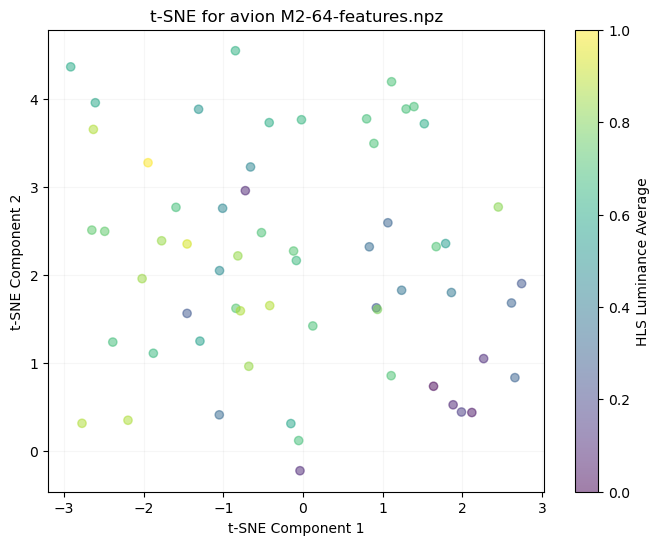

File: M2-64-features.npz, Array (fps): ()
File: M2-64-features.npz, Array (window_limit): (61, 2)
File: M2-64-features.npz, Array (omnivore): (61, 1024)
File: M2-64-features.npz, Array (slowfast): (61, 1600)
File: M2-64-features.npz, Array (avion): (61, 3806)
File: M2-64-features.npz, Array (objects_conf): (61,)
File: M2-64-features.npz, Array (objects_bbox): (61,)
File: M2-64-features.npz, Array (hls_l_avg): (61,)


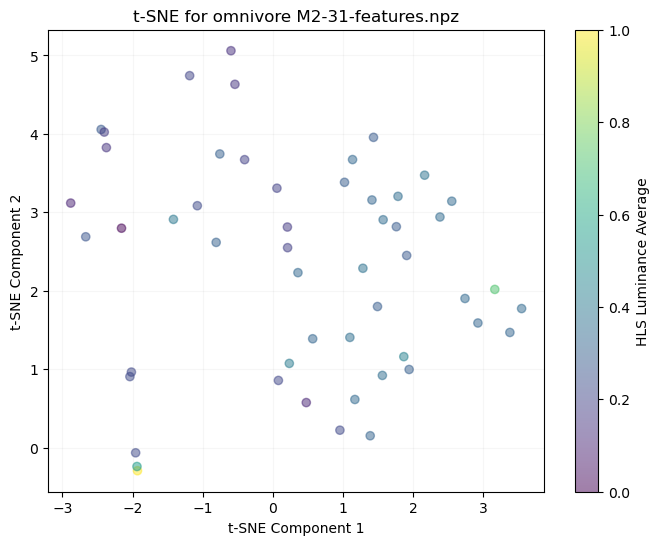

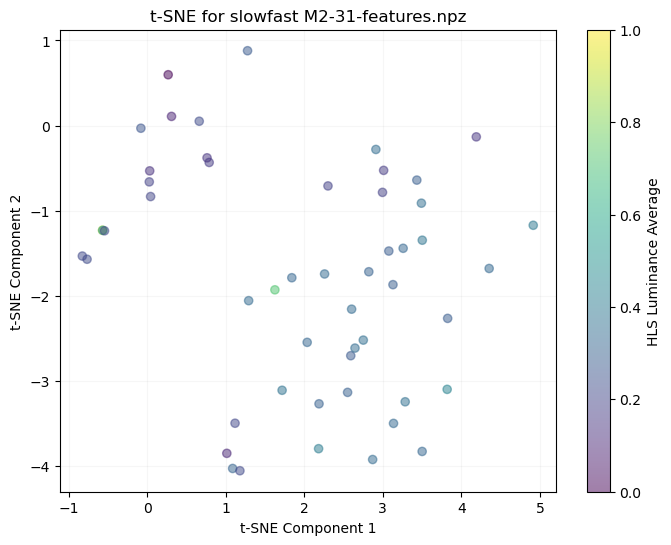

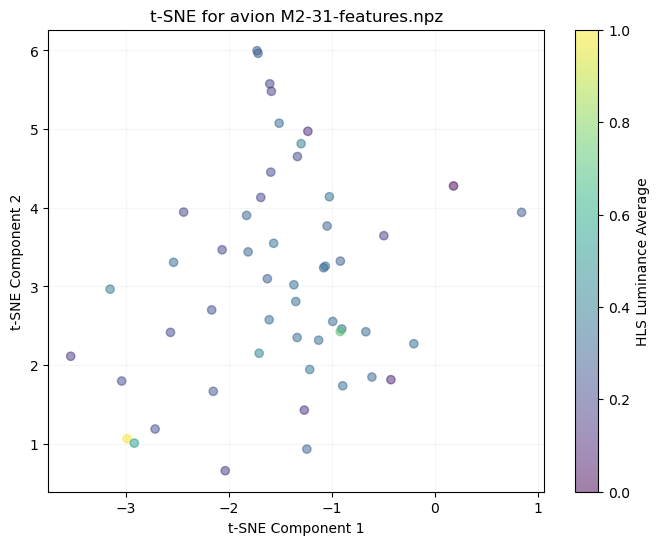

File: M2-31-features.npz, Array (fps): ()
File: M2-31-features.npz, Array (window_limit): (52, 2)
File: M2-31-features.npz, Array (omnivore): (52, 1024)
File: M2-31-features.npz, Array (slowfast): (52, 1600)
File: M2-31-features.npz, Array (avion): (52, 3806)
File: M2-31-features.npz, Array (objects_conf): (52,)
File: M2-31-features.npz, Array (objects_bbox): (52,)
File: M2-31-features.npz, Array (hls_l_avg): (52,)


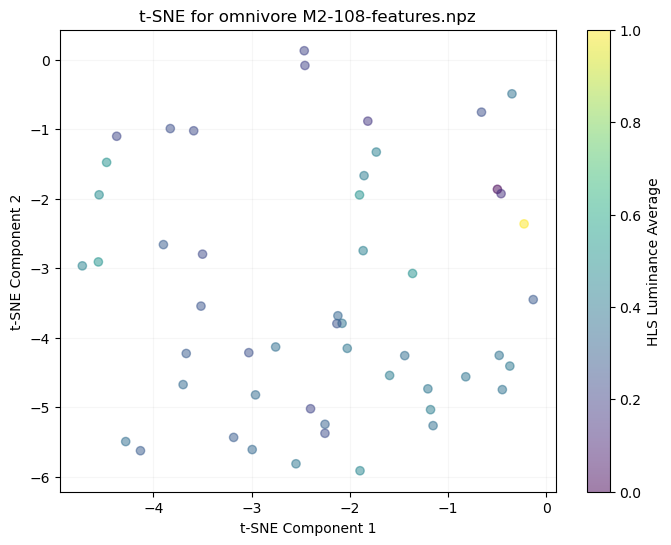

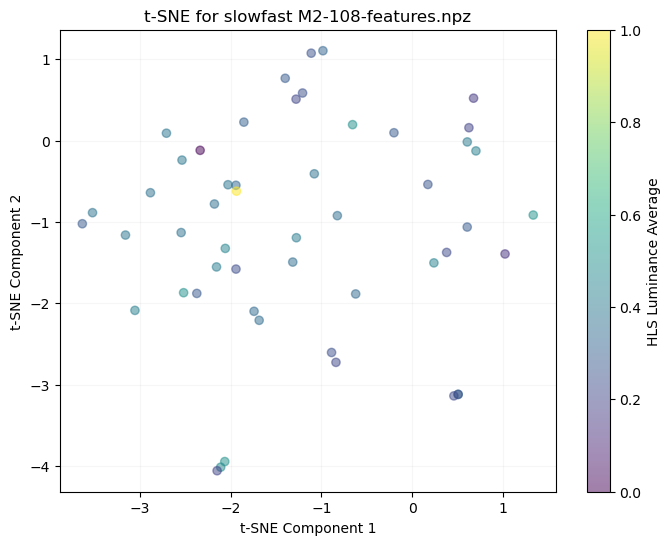

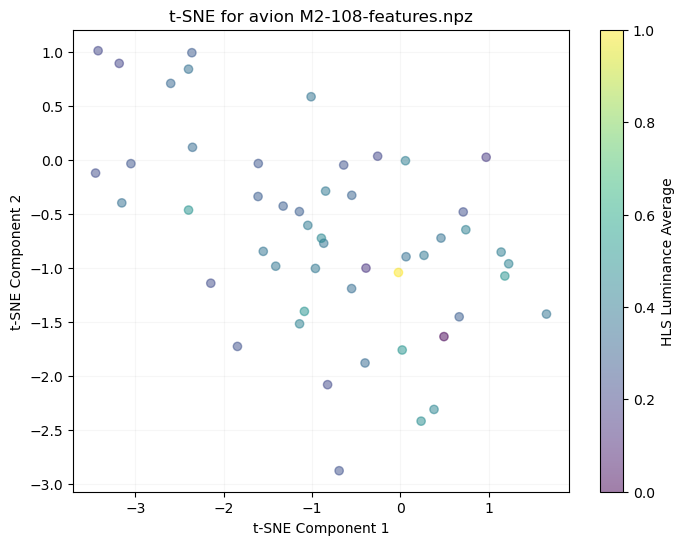

File: M2-108-features.npz, Array (fps): ()
File: M2-108-features.npz, Array (window_limit): (51, 2)
File: M2-108-features.npz, Array (omnivore): (51, 1024)
File: M2-108-features.npz, Array (slowfast): (51, 1600)
File: M2-108-features.npz, Array (avion): (51, 3806)
File: M2-108-features.npz, Array (objects_conf): (51,)
File: M2-108-features.npz, Array (objects_bbox): (51,)
File: M2-108-features.npz, Array (hls_l_avg): (51,)


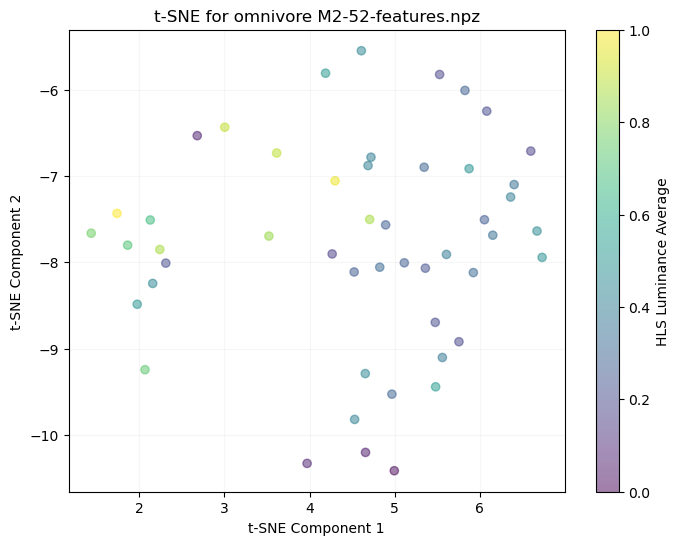

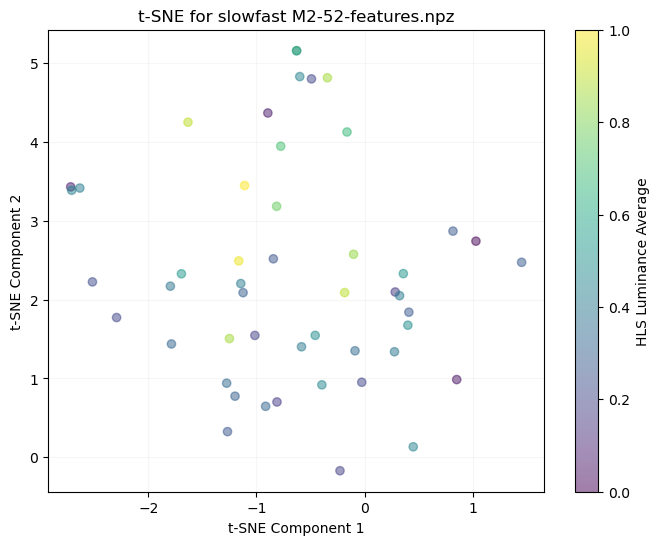

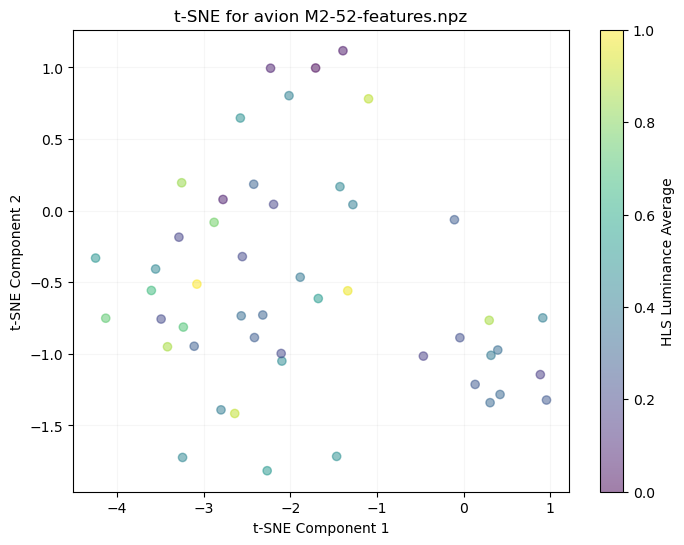

File: M2-52-features.npz, Array (fps): ()
File: M2-52-features.npz, Array (window_limit): (49, 2)
File: M2-52-features.npz, Array (omnivore): (49, 1024)
File: M2-52-features.npz, Array (slowfast): (49, 1600)
File: M2-52-features.npz, Array (avion): (49, 3806)
File: M2-52-features.npz, Array (objects_conf): (49,)
File: M2-52-features.npz, Array (objects_bbox): (49,)
File: M2-52-features.npz, Array (hls_l_avg): (49,)


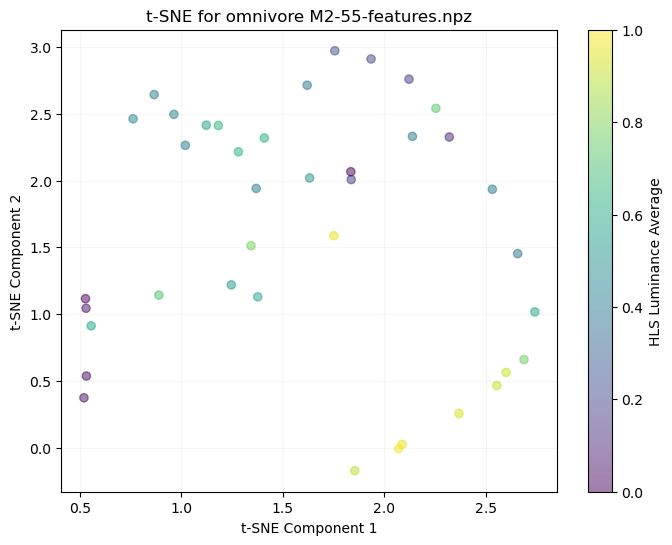

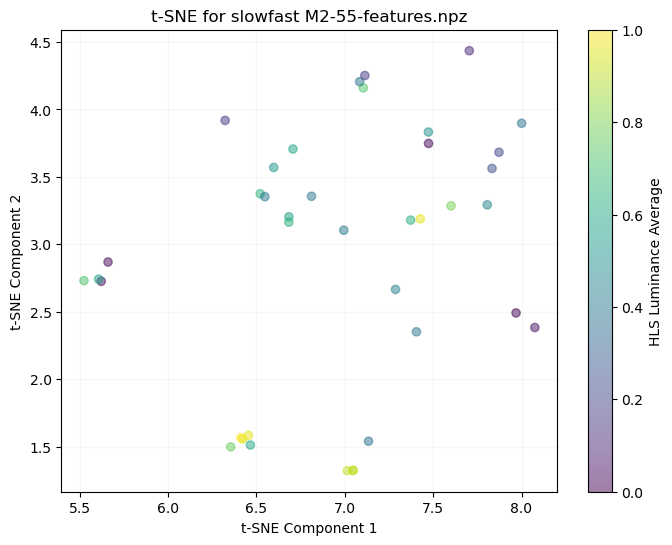

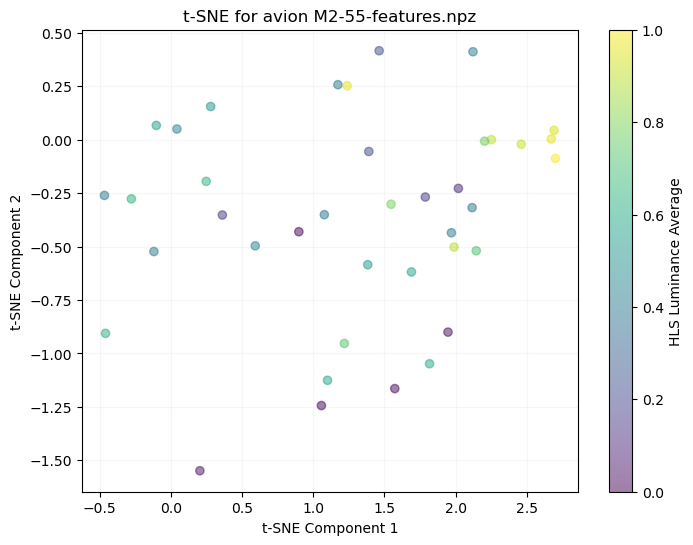

File: M2-55-features.npz, Array (fps): ()
File: M2-55-features.npz, Array (window_limit): (39, 2)
File: M2-55-features.npz, Array (omnivore): (39, 1024)
File: M2-55-features.npz, Array (slowfast): (39, 1600)
File: M2-55-features.npz, Array (avion): (39, 3806)
File: M2-55-features.npz, Array (objects_conf): (39,)
File: M2-55-features.npz, Array (objects_bbox): (39,)
File: M2-55-features.npz, Array (hls_l_avg): (39,)


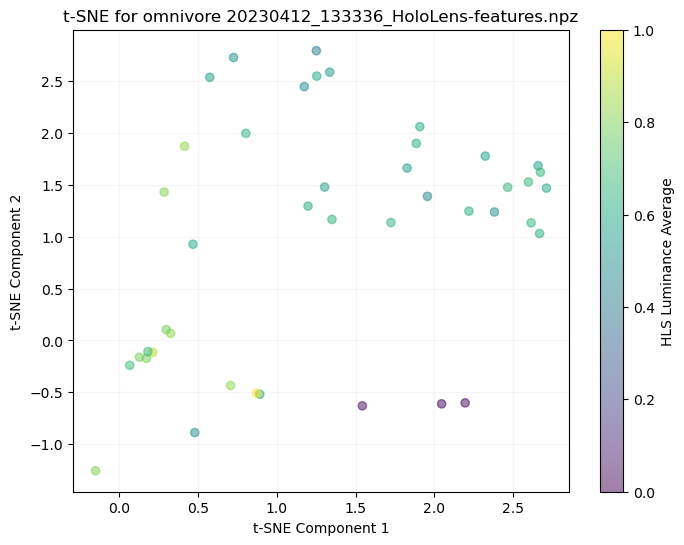

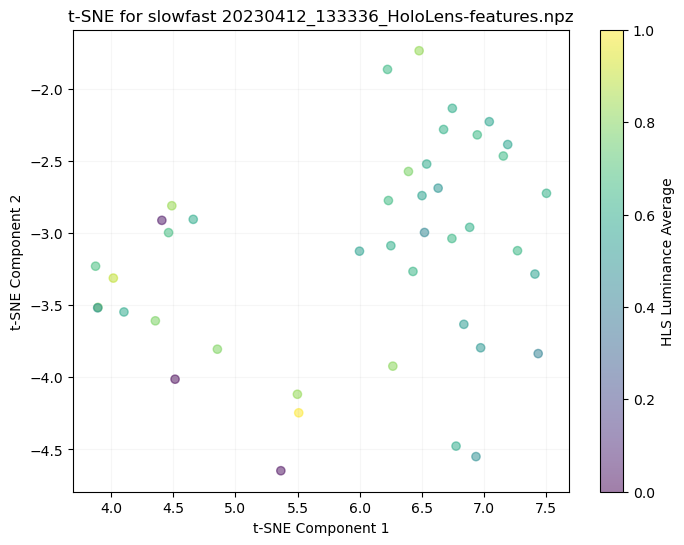

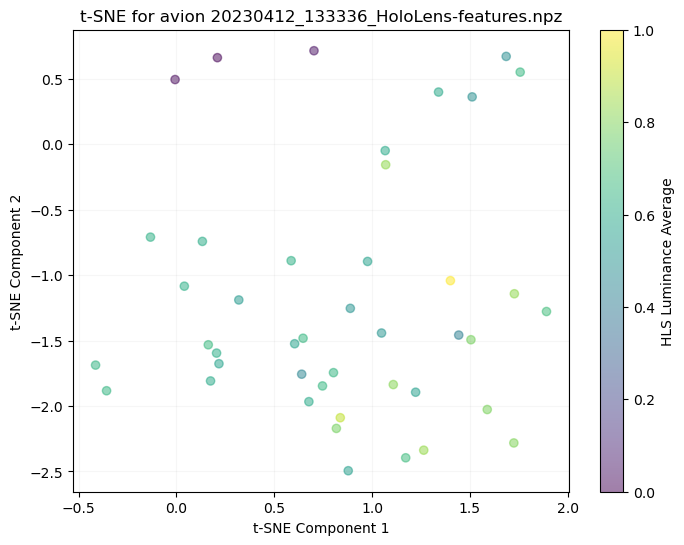

File: 20230412_133336_HoloLens-features.npz, Array (fps): ()
File: 20230412_133336_HoloLens-features.npz, Array (window_limit): (43, 2)
File: 20230412_133336_HoloLens-features.npz, Array (omnivore): (43, 1024)
File: 20230412_133336_HoloLens-features.npz, Array (slowfast): (43, 1600)
File: 20230412_133336_HoloLens-features.npz, Array (avion): (43, 3806)
File: 20230412_133336_HoloLens-features.npz, Array (objects_conf): (43,)
File: 20230412_133336_HoloLens-features.npz, Array (objects_bbox): (43,)
File: 20230412_133336_HoloLens-features.npz, Array (hls_l_avg): (43,)


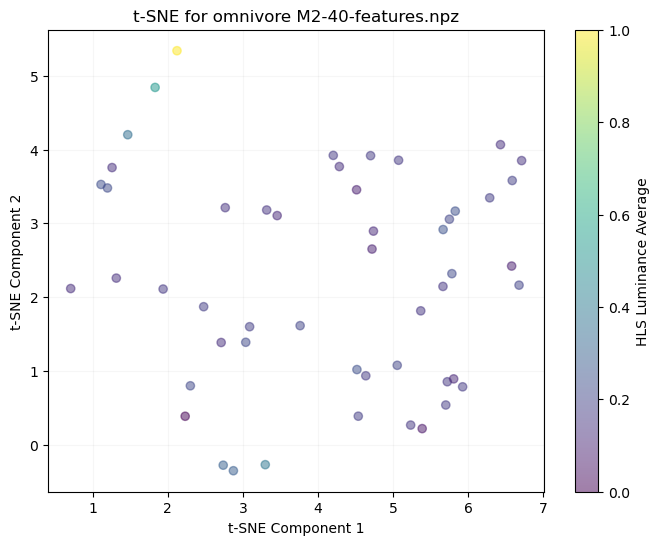

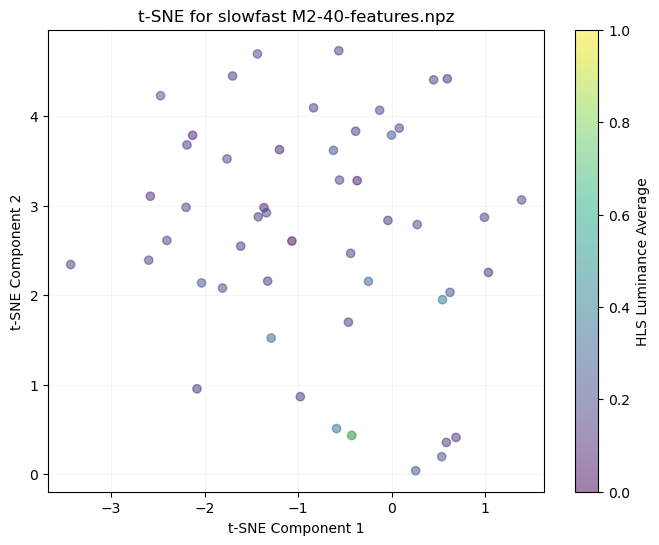

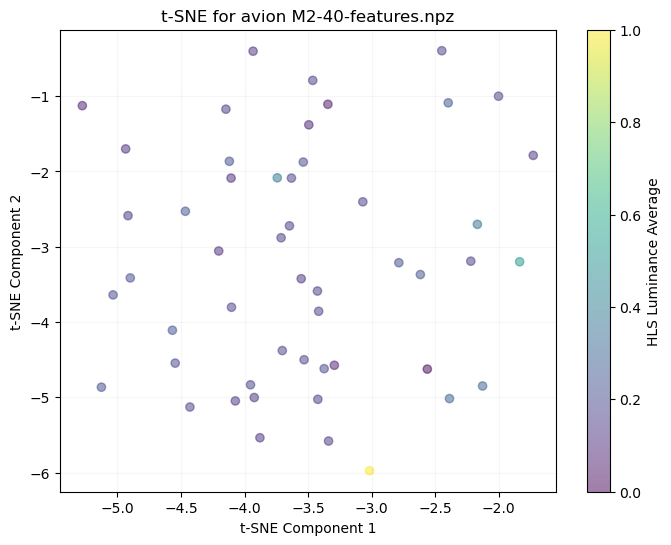

File: M2-40-features.npz, Array (fps): ()
File: M2-40-features.npz, Array (window_limit): (51, 2)
File: M2-40-features.npz, Array (omnivore): (51, 1024)
File: M2-40-features.npz, Array (slowfast): (51, 1600)
File: M2-40-features.npz, Array (avion): (51, 3806)
File: M2-40-features.npz, Array (objects_conf): (51,)
File: M2-40-features.npz, Array (objects_bbox): (51,)
File: M2-40-features.npz, Array (hls_l_avg): (51,)


ValueError: perplexity must be less than n_samples

In [18]:
import os
import numpy as np

# Specify the folder where your files are located
folder_path = user_path

# List all files in the folder
files = os.listdir(folder_path)

# Loop through each file
for file_name in files:
    # Check if the file is an npz file
    if file_name.endswith('.npz'):
        file_path = os.path.join(folder_path, file_name)
        
        # Load the content of the npz file with allow_pickle=True
        data = np.load(file_path, allow_pickle=True)

        plot_TSNE_hls([], data['omnivore'], "omnivore " + file_name, data['hls_l_avg'])
        plot_TSNE_hls([], data['slowfast'], "slowfast "+ file_name, data['hls_l_avg'])
        plot_TSNE_hls([], data['avion'], "avion " + file_name, data['hls_l_avg'])

        # Assuming your npz file contains arrays, you can access them by keys
        for key in data.keys():
            array = data[key]
            # Do something with the array, for example print its shape
            print(f"File: {file_name}, Array ({key}): {array.shape}")


## Getting the labels and features. 20 sessions from the test dataset were used here. 

In [6]:
import os
import numpy as np

# From selected sessions, get an array of array that contains labels and features
def get_label_features(files_to_keep, modules_features, modules_labels, folder_path):
    # array contains labels and features for selected sessions
    arrays = {}
    # Initialize arrays for features and labels
    for module in modules_features:
        arrays[f"{module}_features_array"] = []
    for module in modules_labels:
        arrays[f"{module}_labels_array"] = []
    
    # Precompute the feature and label file names
    feature_files_to_keep = [f"{name}-features.npz" for name in files_to_keep]
    label_files_to_keep = [f"{name}-window_label.npz" for name in files_to_keep]
    
    print(feature_files_to_keep)
    # Iterate through the list of files to keep
    for idx in range(len(files_to_keep)):
        feat_file_path = os.path.join(folder_path, feature_files_to_keep[idx])
        # file_path = os.path.join(folder_path, file_name)
        try:
            features_data = np.load(feat_file_path)
            for module in modules_features:
                arrays[f"{module}_features_array"].append(features_data[module])  # Adjust based on how you saved the array
        except Exception as e:
            print(f"Error loading {file_name}: {e}")
    
        label_file_path = os.path.join(folder_path, label_files_to_keep[idx])
        try:
            labels_data = np.load(label_file_path)
            for module in modules_labels:
                arrays[f"{module}_labels_array"].append(labels_data[module])  # Adjust based on how you saved the array
        except Exception as e:
            print(f"Error loading {file_name}: {e}")
                
    # Output the number of sessions
    print(len(files_to_keep))  # number of sessions
    
    # Concatenate all sessions
    # Convert the lists to NumPy arrays if needed
    # for module in modules_features:
    #     arrays[f"{module}_features_array"] = np.vstack(arrays[f"{module}_features_array"])
    # for module in modules_labels:
    #     arrays[f"{module}_labels_array"] = np.concatenate(arrays[f"{module}_labels_array"])
    
    # Printing lengths and shapes for verification
    # for module in modules_features:
    #     print(len(arrays[f"{module}_features_array"]))
    for module in modules_labels:
        print(len(arrays[f"{module}_labels_array"]))
    return arrays

In [ ]:
# Files to keep
files_to_keep = [ "M2-136", "M2-23", "M2-30", "M2-110", "M2-41", "M2-36", "M2-103", "M2-81", "M2-19", "M2-73",
    "20230403_095034_HoloLens", "20240411_070705_HoloLens", "20230424_104421_HoloLens", "20230403_095943_HoloLens",
    "3_tourns_2", "3_tourns_3", "tourn_blue",
    "20230403_105336_HoloLens", "20240423_101046_HoloLens", "zed-0-1-December10-UUID-d8e2d85c-9174-4a13-840c-a1e6a12b1ba8"
]
# Define arrays
modules_features = ['action', 'frame', 'object']
modules_labels = ['label_desc', 'label_pred', 'label_pred_desc']

data = get_label_features(files_to_keep, modules_features, modules_labels, path_original_data)
print(data)

## Generate data for ARModelDebugger

In [8]:
import numpy as np
import json
from enum import Enum

def generate_data(arrays, files_to_keep, path ):
    subject_id = 'Skill_M2'
    output_data = []
    sessions_metadata = {subject_id: {}}
    
    # Create a PDF to save the plots
    for i, (trial_id) in enumerate(files_to_keep):
        print(subject_id)
        print(trial_id)
    
        # Confidence values
        confidence_values = arrays['label_pred_labels_array'][i]
        # Ground truth values
        ground_truth = arrays['label_desc_labels_array'][i]
        # Prediction values
        predictions = arrays['label_pred_desc_labels_array'][i]
        # Extract the highest confidence value from each array
        highest_confidence_values = [float(max(arr)) for arr in confidence_values]
        # Determine errors
        error = ['error' if gt != pred else 'None' for gt, pred in zip(ground_truth, predictions)]
        
        # Format the data as per the desired structure
        trial_data = {
            "subject_id": subject_id,
            "trial_id": trial_id,
            "data": [
                {
                    "Step": gt,
                    "Error": err,
                    "seconds": idx,  # Position in the array # the duration of a windows is 2 seconds
                    "Prediction": pred,
                    "Confidence": hcv
                } for idx, (gt, err, pred, hcv) in enumerate(zip(ground_truth, error, predictions, highest_confidence_values))
            ]
        }
        output_data.append(trial_data)
    
        # Add duration to sessions_metadata
        sessions_metadata[subject_id][trial_id] = {
            "duration_seconds": len(ground_truth)
        }
    
    # Save data (Step, error, seconds, rpedictions, and confidence)
    # Convert to JSON format
    output_json = json.dumps(output_data, indent=4)
    # Save the formatted mission log to a file
    with open(path + 'formatted_mission_log_seconds_reduced_M2.json', 'w') as file:
        file.write(output_json)
    
    # sessions_metadata
    # Convert sessions_metadata to JSON format
    sessions_metadata_json = json.dumps(sessions_metadata, indent=4)
    # Save the sessions metadata to a file
    sessions_metadata_file = path + 'sessions_metadata_reduced_M2.json'
    with open(sessions_metadata_file, 'w') as file:
        file.write(sessions_metadata_json)
    
    print("Session metadata has been saved to sessions_metadata.json")

In [9]:
# Path to ARModelDebugger data
path_ARMD = user_path + 'ARModelDebugger/data/'

generate_data(data, files_to_keep, path_ARMD)

Skill_M2
M2-136
Skill_M2
M2-23
Skill_M2
M2-30
Skill_M2
M2-110
Skill_M2
M2-41
Skill_M2
M2-36
Skill_M2
M2-103
Skill_M2
M2-81
Skill_M2
M2-19
Skill_M2
M2-73
Skill_M2
20230403_095034_HoloLens
Skill_M2
20240411_070705_HoloLens
Skill_M2
20230424_104421_HoloLens
Skill_M2
20230403_095943_HoloLens
Skill_M2
3_tourns_2
Skill_M2
3_tourns_3
Skill_M2
tourn_blue
Skill_M2
20230403_105336_HoloLens
Skill_M2
20240423_101046_HoloLens
Skill_M2
zed-0-1-December10-UUID-d8e2d85c-9174-4a13-840c-a1e6a12b1ba8
Session metadata has been saved to sessions_metadata.json


## Model output visualization
The ground truth and predictions are shown in the first an second plots, respectively. Color encondes the steps. The third plot shows the errors. Blanck color represents an error.

0


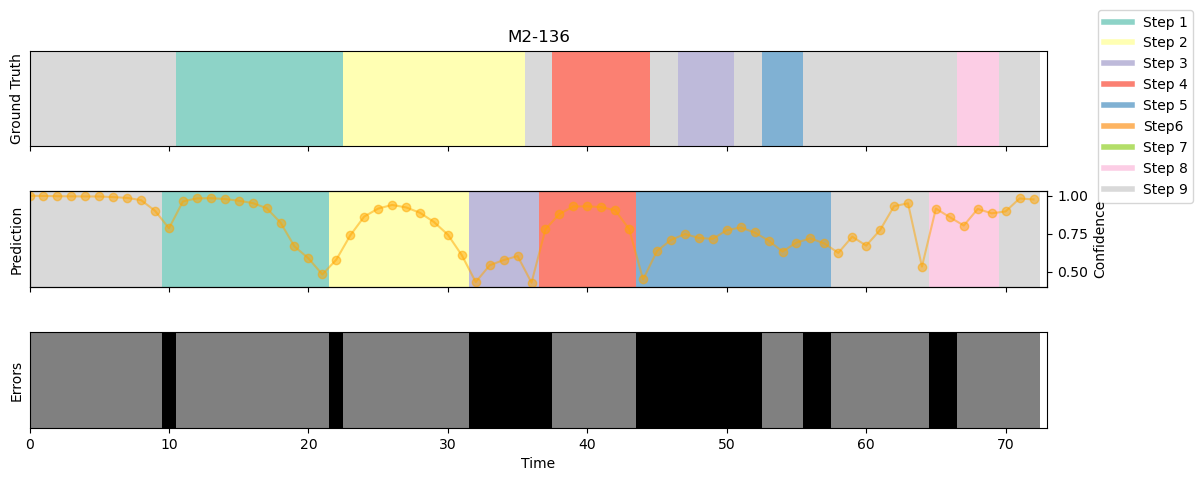

1


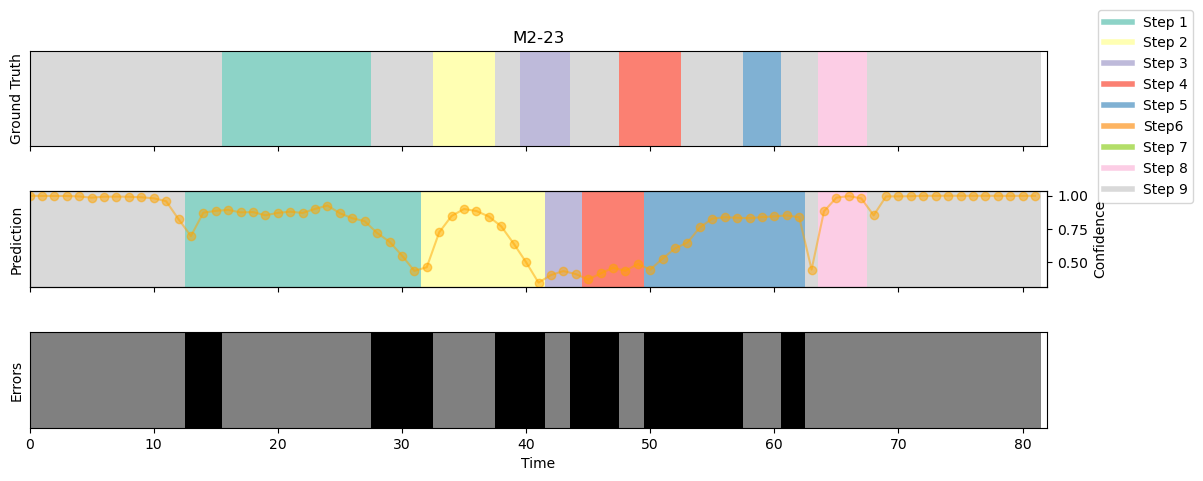

2


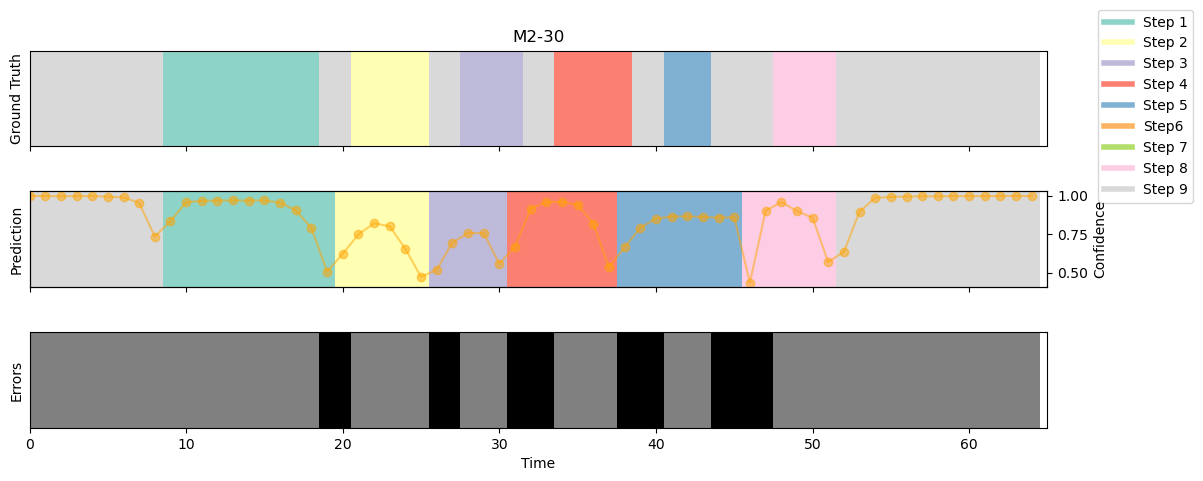

3


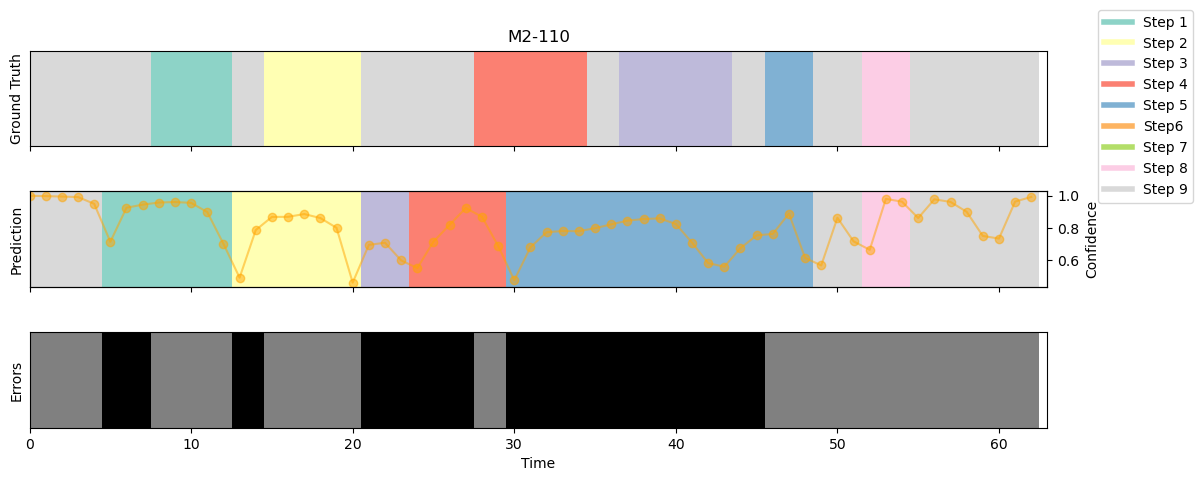

4


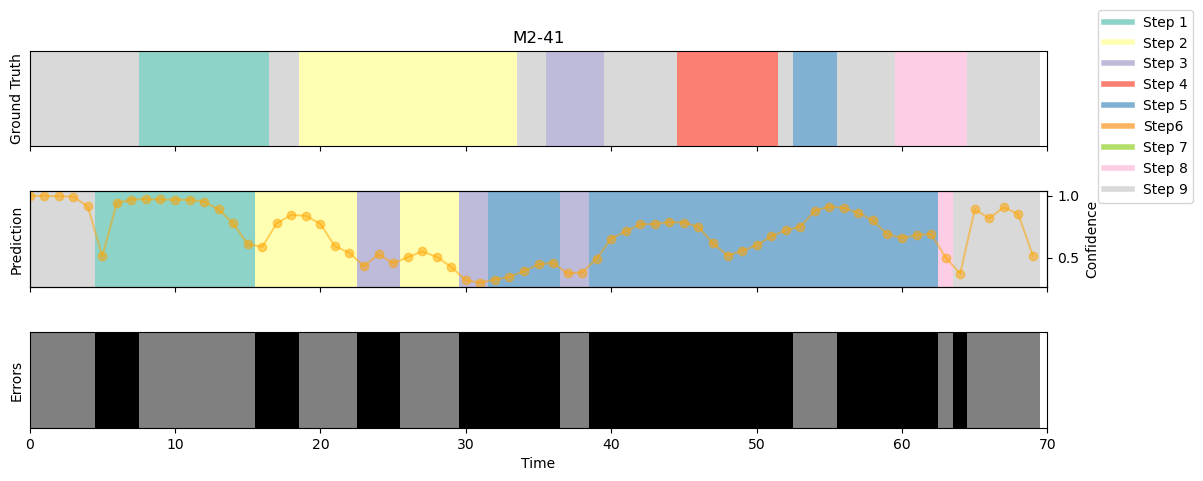

5


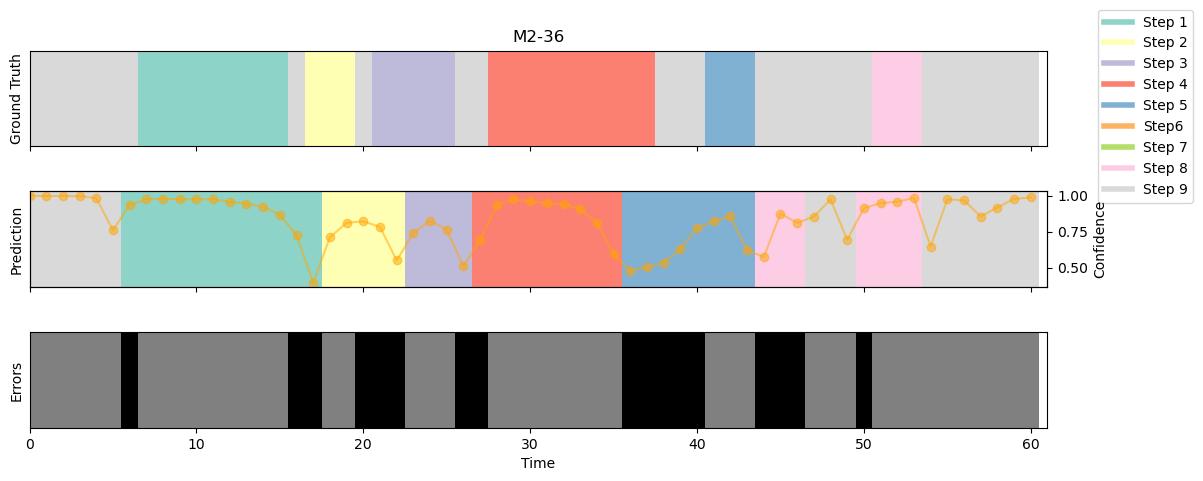

6


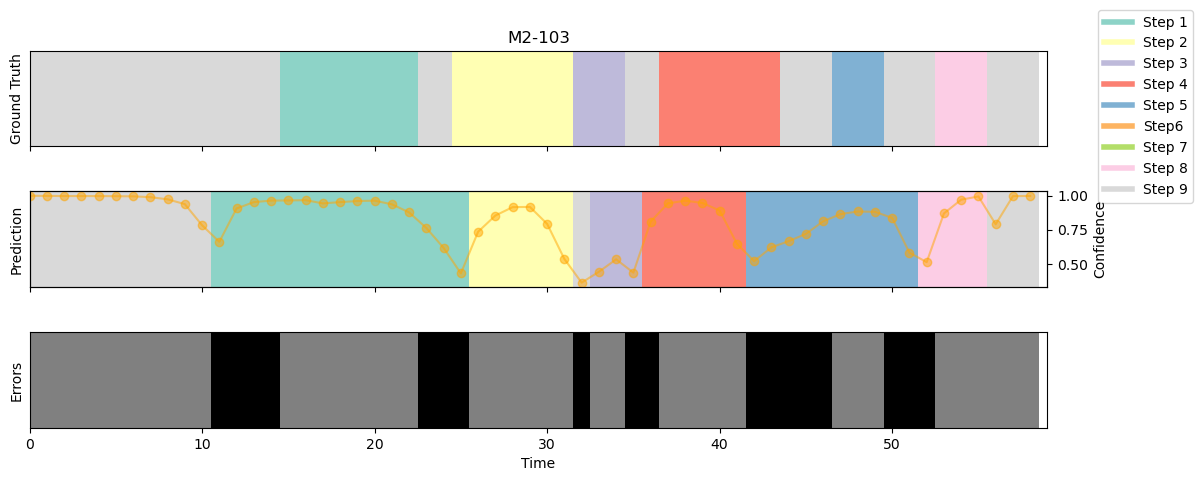

7


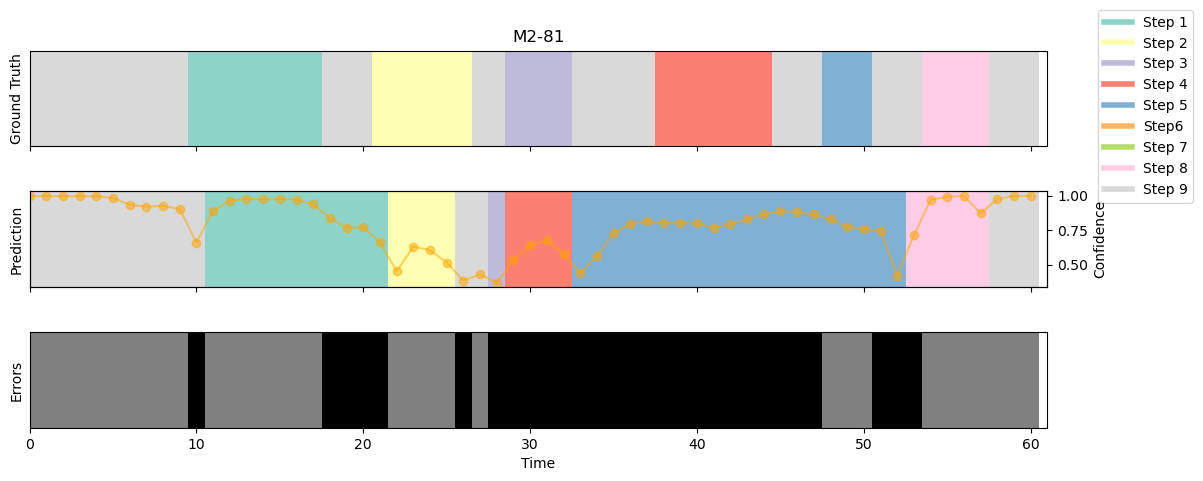

8


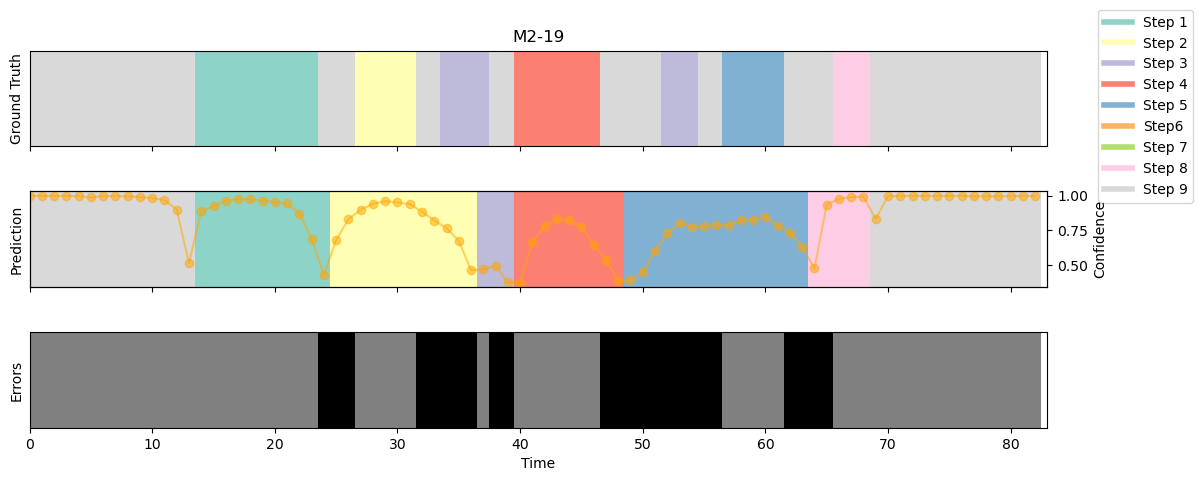

9


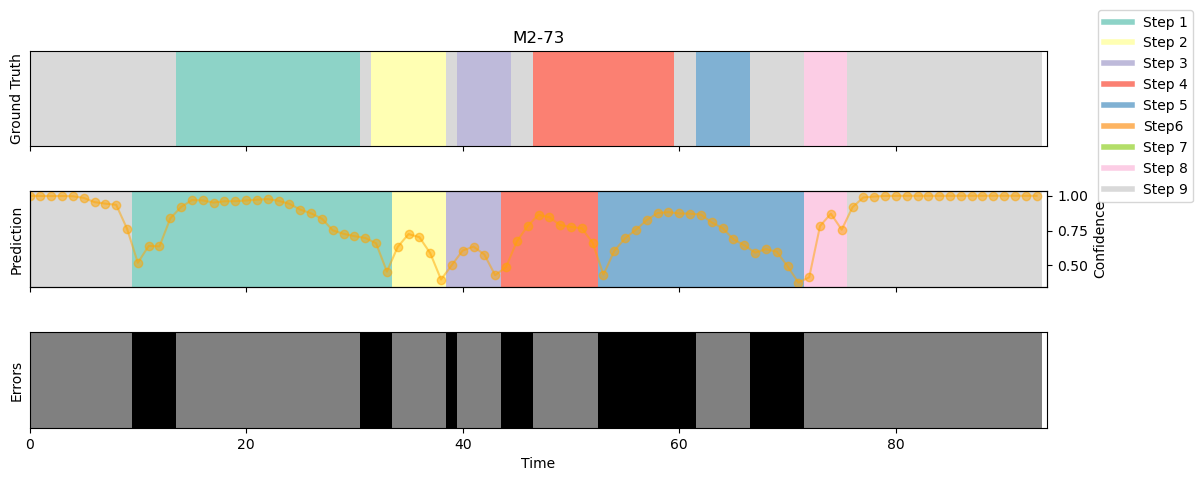

10


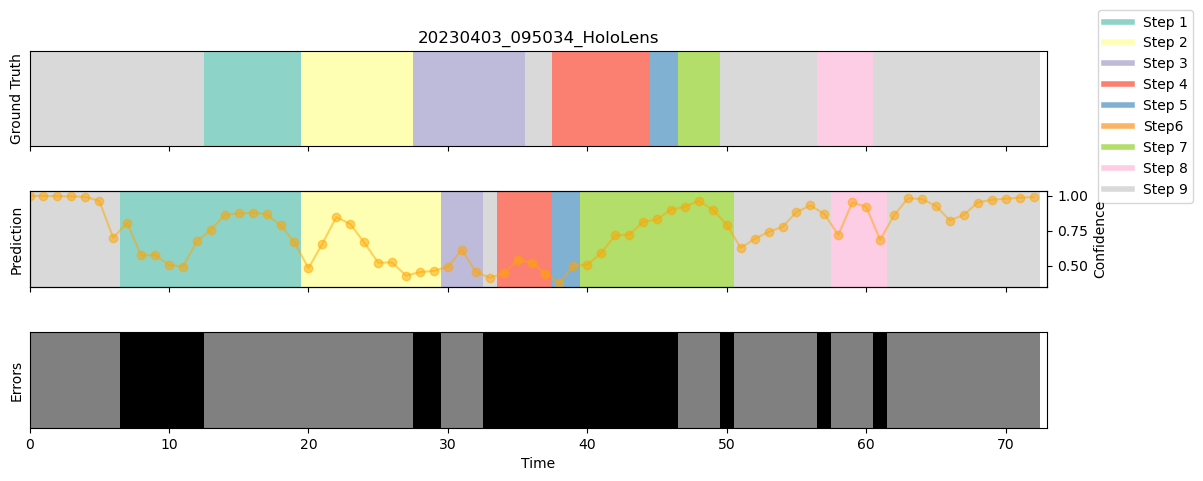

11


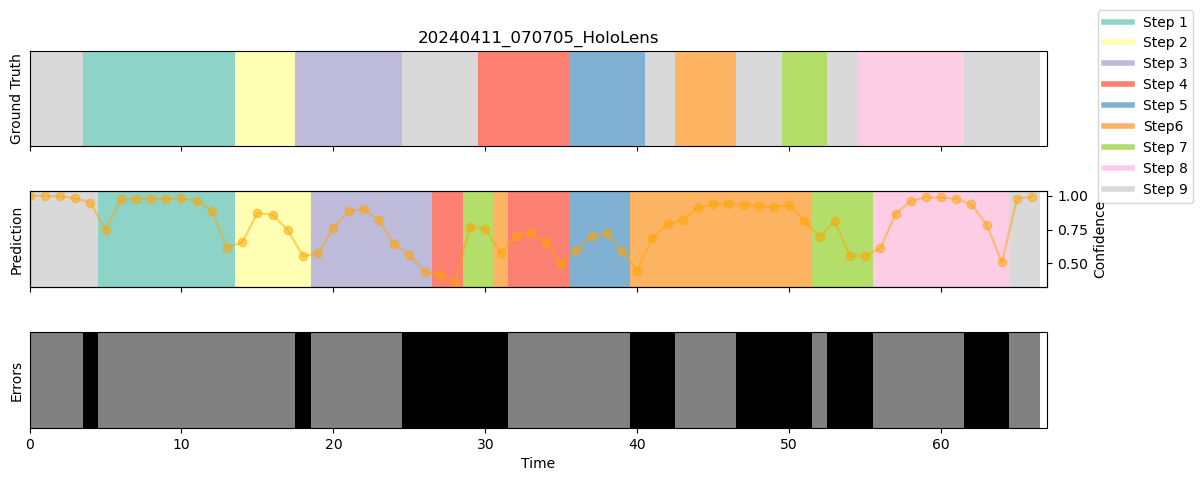

12


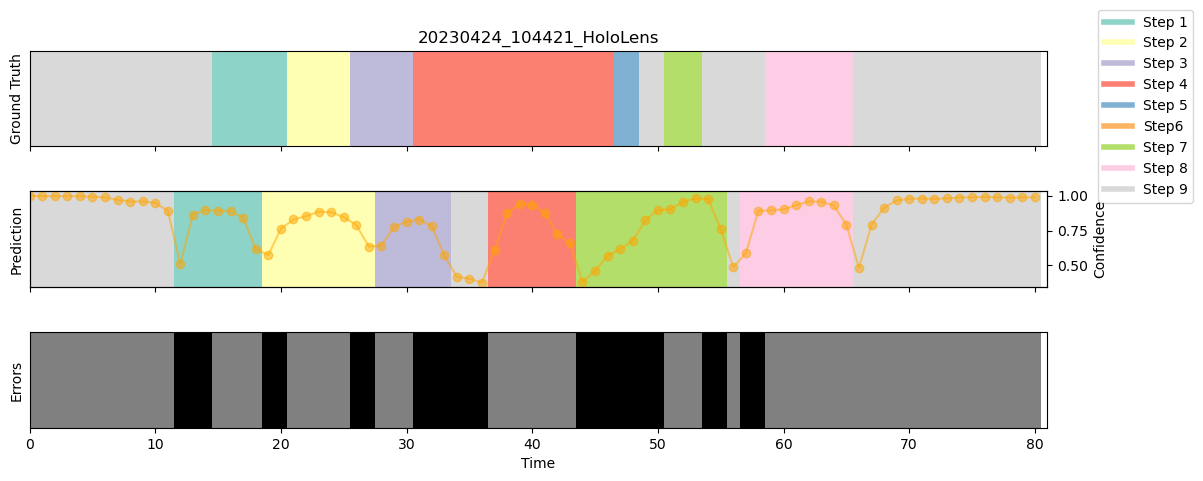

13


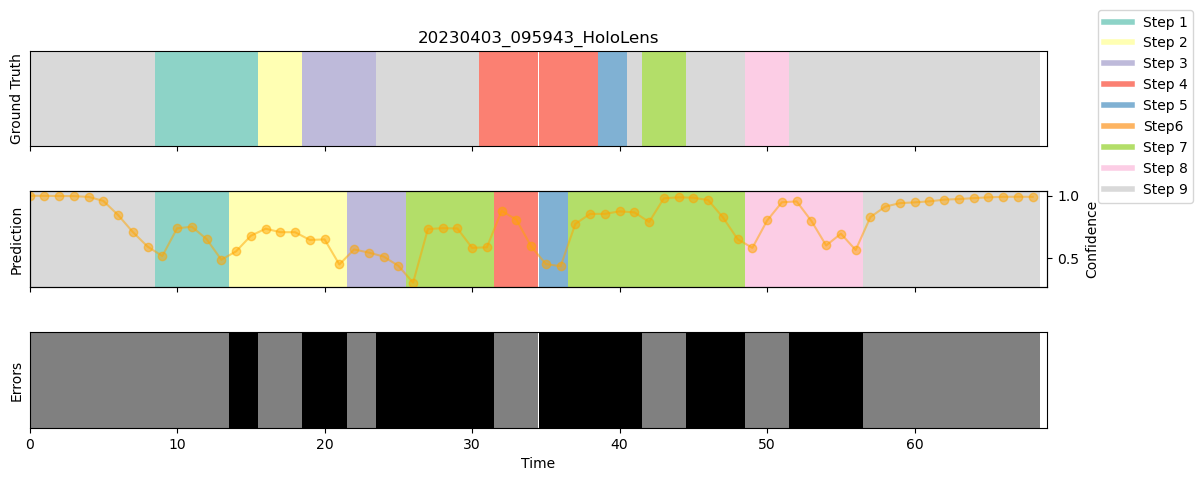

14


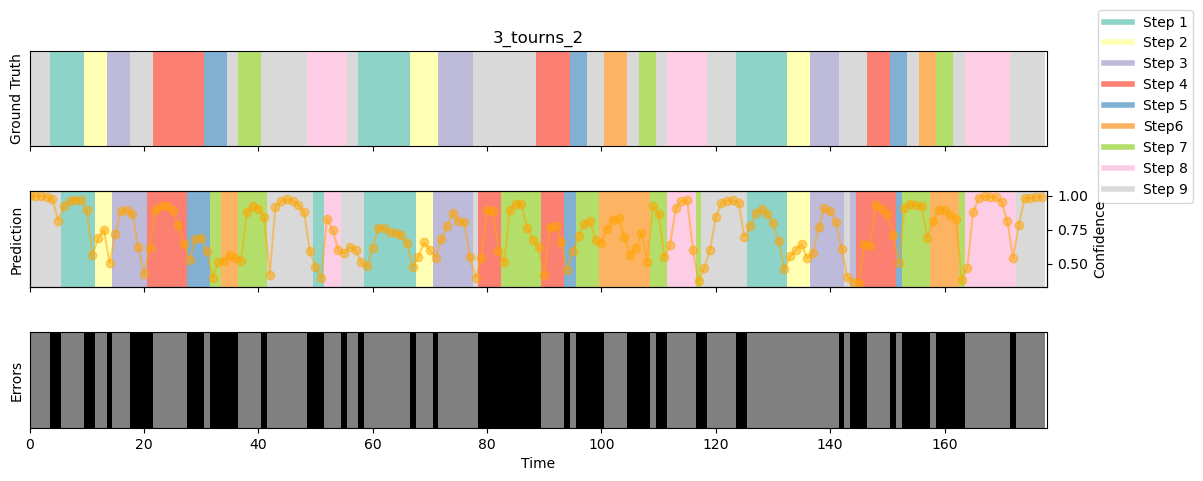

15


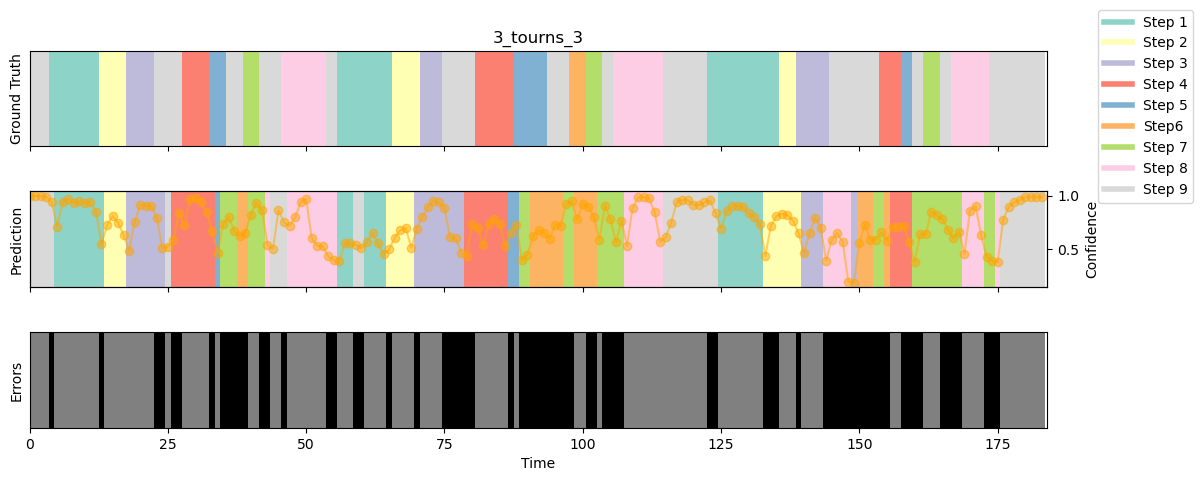

16


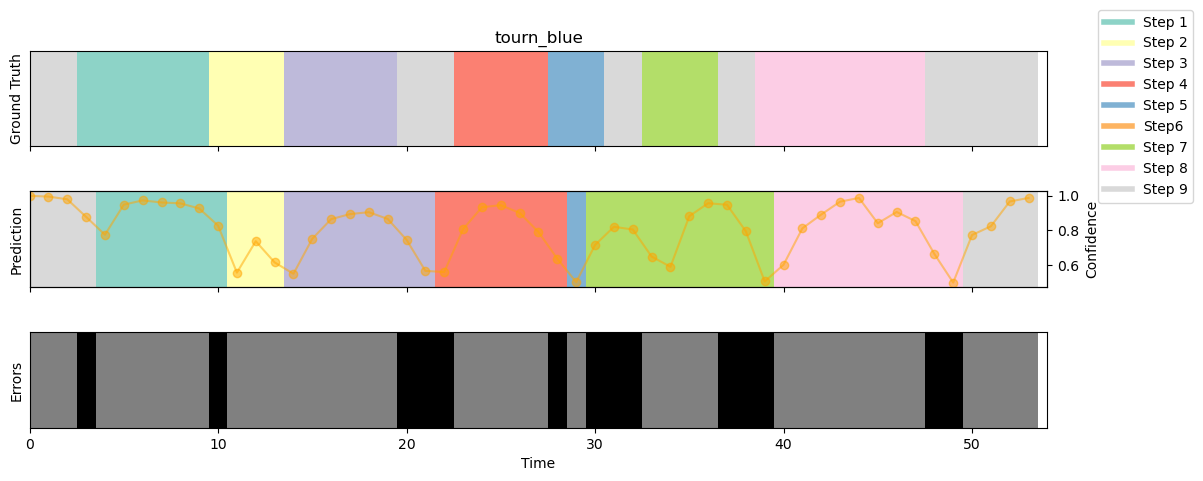

17


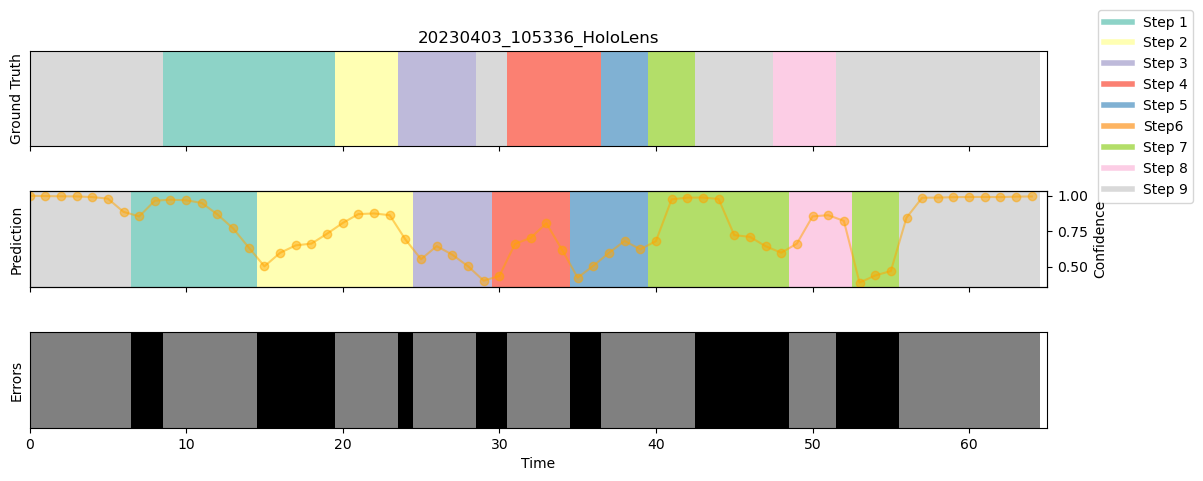

18


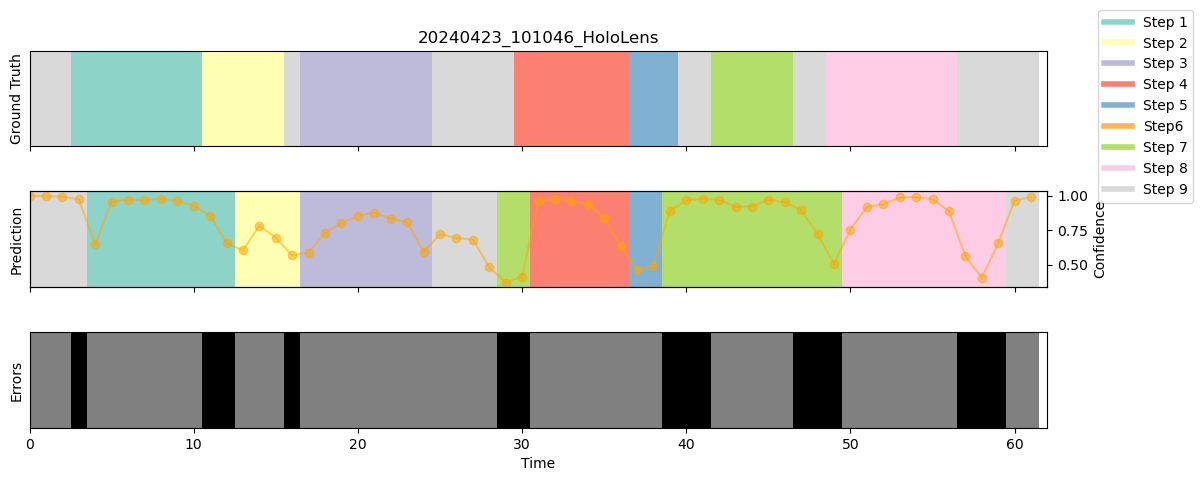

19


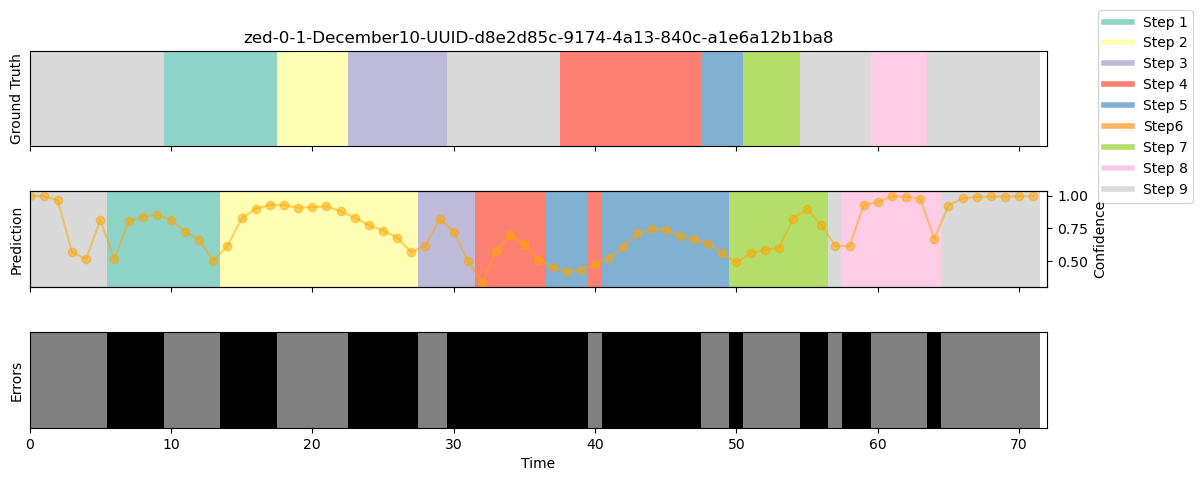

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages


def def_color_map(classes):
    # Generate a color map from the Set3 colormap
    cmap = plt.get_cmap('Set3')
    num_colors = len(classes)
    
    # Get the first `num_colors` colors from the colormap
    colors = cmap(np.arange(num_colors).astype(int))
    
    # Create the color dictionary
    color_dict = {class_name: color for class_name, color in zip(classes, colors)}
    
    return color_dict

from enum import Enum

step_labels = {
    'Place tourniquet over affected extremity 2-3 inches above wound site.': 'Step 1',
    'Pull tourniquet tight.': 'Step 2',
    'Apply strap to strap body.': 'Step 3',
    'Turn windless clock wise or counter clockwise until hemorrhage is controlled.': 'Step 4',
    'Lock windless into the windless keeper.': 'Step 5',
    'Pull remaining strap over the windless keeper.': 'Step6',
    'Secure strap and windless keeper with keeper securing device.': 'Step 7',
    'Mark time on securing device strap with permanent marker.': 'Step 8',
    'No step': 'Step 9',
}
# Extract the steps names
steps = list(step_labels.keys())
# Create a color map for the different classes, avoiding white
colors = def_color_map(steps) 

# Create a PDF to save the plots
with PdfPages('test_plot.pdf') as pdf:
    for i, (temp) in enumerate(data['label_pred_labels_array']):
        print(i)
        # print (len(data['label_desc_labels_array'][i]))
        # print (len(data['label_pred_desc_labels_array'][i]))
        # print (len(data['label_pred_labels_array'][i]))
    
        # Your confidence values
        confidence_values = data['label_pred_labels_array'][i]
        ground_truth = data['label_desc_labels_array'][i]
        predictions = data['label_pred_desc_labels_array'][i]
        
        # Extract the highest confidence value from each array
        highest_confidence_values = [max(arr) for arr in confidence_values]
    
    
        # Convert the ground truth and predictions to colors
        ground_truth_colors = [colors[step] for step in ground_truth]
        prediction_colors = [colors[step] for step in predictions]
        
        # Determine errors
        error_colors = ['black' if gt != pred else 'gray' for gt, pred in zip(ground_truth, predictions)]
        
        # Define the width of the bars (1 makes bars touch each other)
        bar_width = 1.0
    
    
    
        # Plotting
        fig, axs = plt.subplots(3, 1, figsize=(12, 5), sharex=True)
        
        # Ground truth bar chart
        axs[0].bar(range(len(ground_truth)), [0.5]*len(ground_truth), color=ground_truth_colors, edgecolor='none', width=bar_width)
        axs[0].set_ylabel('Ground Truth')
        axs[0].set_yticks([])  # Hide y-axis ticks
        axs[0].set_ylim([0, 0.5])
        axs[0].set_xlim([0, len(ground_truth)])
        axs[0].set_title(files_to_keep[i])
        
        # Predictions bar chart
        axs[1].bar(range(len(predictions)), [0.5]*len(predictions), color=prediction_colors, edgecolor='none', width=bar_width)
        axs[1].set_ylabel('Prediction') # Predictions with Highest Confidence Values Over Time
        axs[1].set_yticks([])  # Hide y-axis ticks
        axs[1].set_ylim([0, 0.5])
        
        # Errors bar chart
        axs[2].bar(range(len(error_colors)), [0.5]*len(error_colors), color=error_colors, edgecolor='none', width=bar_width)
        axs[2].set_ylabel('Errors')
        axs[2].set_yticks([])  # Hide y-axis ticks
        axs[2].set_ylim([0, 0.5])
        axs[2].set_xlabel('Time')
        
        # Plot highest confidence values over time
        ax2 = axs[1].twinx()
        ax2.plot(highest_confidence_values, marker='o', linestyle='-', color='orange', alpha=0.5)
        ax2.set_ylabel('Confidence')
    
        # Create custom legend
        legend_elements = [plt.Line2D([0], [0], color=color, lw=4, label=step_labels[step])
                           for step, color in colors.items()]
        axs[0].legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.15, 1.5))
    
        plt.tight_layout()
        plt.show()
        # save PDF
        pdf.savefig(fig)  # Save the current figure into the PDF
        plt.close(fig)  # Close the figure to free memory
        # break


## Visualization of the embedding space

In [11]:
# Concatenate all sessions
# Convert the lists to NumPy arrays if needed
for module in modules_features:
    data[f"{module}_features_array_concatenated"] = np.vstack(data[f"{module}_features_array"])
for module in modules_labels:
    data[f"{module}_labels_array_concatenated"] = np.concatenate(data[f"{module}_labels_array"])

In [12]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def plot_TSNE(labels, features, title, save_fig = False):

    # 1. Data Preprocessing (Standardization)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(features)
    # Assuming your data is stored in a variable named 'data'
    # data should be a 2D NumPy array with shape (n_instances, n_features)
    
    # 2. t-SNE
    tsne = TSNE(n_components=2, random_state=42)  # We want to keep 2 components for 2D visualization
    tsne_components = tsne.fit_transform(data_scaled)
    
    # 3. Plotting
    plt.figure(figsize=(8, 6))
    for label in np.unique(labels):
        plt.scatter(tsne_components[labels == label, 0],
                    tsne_components[labels == label, 1],
                    label=f'Label {label}')
    # plt.scatter(tsne_components[:, 0], tsne_components[:, 1], alpha=0.5)
    plt.title('t-SNE for ' + title)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.grid(True, alpha=0.07, color='gray')  # Adjust transparency and color of grid lines
    plt.legend(loc='upper right', bbox_to_anchor=(2.2, 1))
    # Save the plot as a PNG file
    if(save_fig):
        plt.savefig(title+ '.png')
    plt.show()

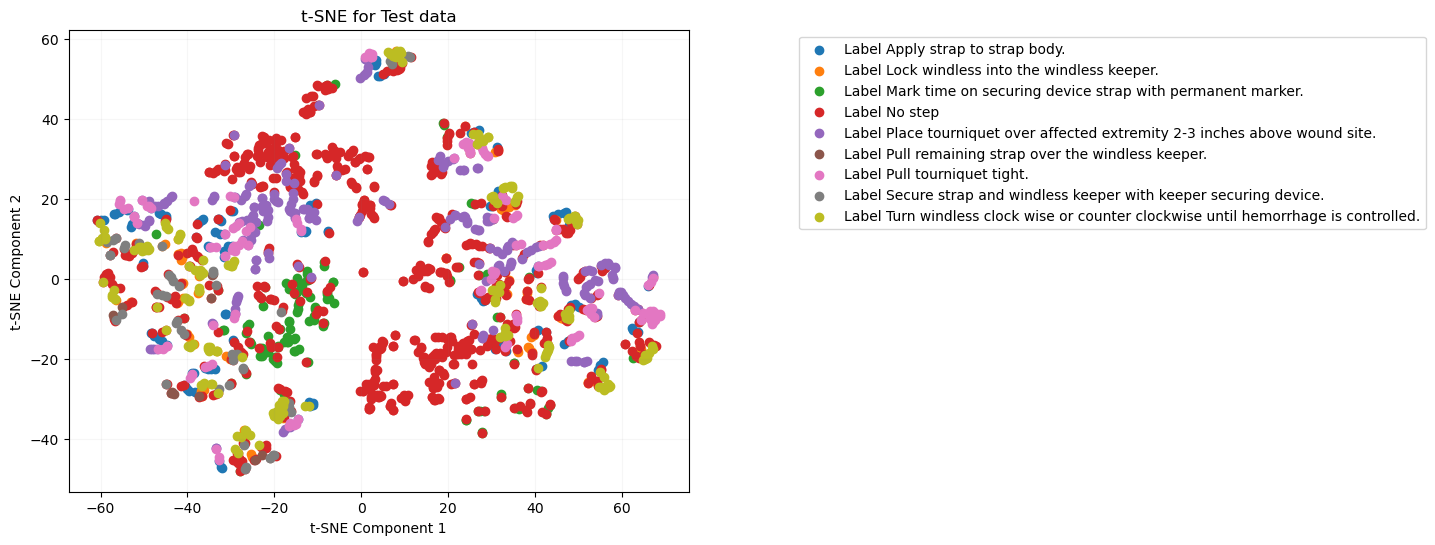

In [13]:
plot_TSNE(data['label_desc_labels_array_concatenated'], data['action_features_array_concatenated'], "Test data")


In [13]:
print(len(data['label_desc_labels_array_concatenated']))  # Print the length of the labels array for label_desc
print(data['action_features_array_concatenated'].shape)   # Print the shape of the features array for action


1616
(1616, 1024)


## Save T-SNE results for Feature Visualization
Get x and y positions using tSNE for each session.


In [77]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import json
import csv

def get_xy_TSNE(labels, features, session, skill, stepLabels):
    print(session)
    print(len(labels))
    print(features.shape)
    
    # 1. Data Preprocessing (Standardization)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(features)
    
    # 2. t-SNE
    tsne = TSNE(n_components=2, random_state=42)  # We want to keep 2 components for 2D visualization
    tsne_components = tsne.fit_transform(data_scaled)
    
    # 3. Prepare t-SNE results
    tsne_results = []
    for i, label in enumerate(labels):
        mapped_label = stepLabels[label]  # Map the label
        tsne_results.append({
            'x': float(tsne_components[i, 0]),  # Convert to native Python float
            'y': float(tsne_components[i, 1]),  # Convert to native Python float
            'label': mapped_label,
            'session': session,
            'skill': skill
        })
    return tsne_results

def get_all_xy_tsne(data, title):
    # Define the label mapping
    stepLabels = {
        'Place tourniquet over affected extremity 2-3 inches above wound site.': 1,
        'Pull tourniquet tight.': 2,
        'Apply strap to strap body.': 3,
        'Turn windless clock wise or counter clockwise until hemorrhage is controlled.': 4,
        'Lock windless into the windless keeper.': 5,
        'Pull remaining strap over the windless keeper.': 6,
        'Secure strap and windless keeper with keeper securing device.': 7,
        'Mark time on securing device strap with permanent marker.': 8,
        'No step': 9,
    }

    skill_name = "Skill_M2"
    
    # Extract the steps names
    steps = list(stepLabels.keys())
    
    # Create a color map for the different classes, avoiding white
    colors = def_color_map(steps) 

    # Define the CSV header
    csv_header = ['x', 'y', 'label', 'session', 'skill']
    csv_file_path = path_ARMD + title + '_tsne_results.csv'
    
    with open(csv_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_header)
        writer.writeheader()
        
        for i, (temp) in enumerate(data['label_pred_labels_array']):
            # Your confidence values
            confidence_values = data['label_pred_labels_array'][i]
            ground_truth = data['label_desc_labels_array'][i]
            predictions = data['label_pred_desc_labels_array'][i]
            
            # Extract the highest confidence value from each array
            highest_confidence_values = [max(arr) for arr in confidence_values]
        
            # Convert the ground truth and predictions to colors
            ground_truth_colors = [colors[step] for step in ground_truth]
            prediction_colors = [colors[step] for step in predictions]
            
            # Determine errors
            error_colors = ['black' if gt != pred else 'gray' for gt, pred in zip(ground_truth, predictions)]
    
            # LOOP each different modules/features (action, object, frames)
            for module in modules_features:
                if module == 'action':
                    print(module)
                    data_module = data[f"{module}_features_array"][i]
                    tsne_results = get_xy_TSNE(ground_truth, data_module, files_to_keep[i], skill_name, stepLabels)
                    for result in tsne_results:
                        writer.writerow(result)
        # Add all sessions
        tsne_results = get_xy_TSNE(data['label_desc_labels_array_concatenated'], data['action_features_array_concatenated'], "all_sessions", skill_name, stepLabels)
        for result in tsne_results:
            writer.writerow(result)
# Make sure to define the def_color_map, path_ARMD, modules_features, and files_to_keep variables or functions before calling get_all_xy_tsne.


In [78]:
get_all_xy_tsne(data, "all_sessions")

action
M2-136
73
(73, 1024)
action
M2-23
82
(82, 1024)
action
M2-30
65
(65, 1024)
action
M2-110
63
(63, 1024)
action
M2-41
70
(70, 1024)
action
M2-36
61
(61, 1024)
action
M2-103
59
(59, 1024)
action
M2-81
61
(61, 1024)
action
M2-19
83
(83, 1024)
action
M2-73
94
(94, 1024)
action
20230403_095034_HoloLens
73
(73, 1024)
action
20240411_070705_HoloLens
67
(67, 1024)
action
20230424_104421_HoloLens
81
(81, 1024)
action
20230403_095943_HoloLens
69
(69, 1024)
action
3_tourns_2
178
(178, 1024)
action
3_tourns_3
184
(184, 1024)
action
tourn_blue
54
(54, 1024)
action
20230403_105336_HoloLens
65
(65, 1024)
action
20240423_101046_HoloLens
62
(62, 1024)
action
zed-0-1-December10-UUID-d8e2d85c-9174-4a13-840c-a1e6a12b1ba8
72
(72, 1024)
all_sessions
1616
(1616, 1024)


In [71]:
print(data['frame_features_array_concatenated'].shape)

data_test = data['frame_features_array_concatenated'].reshape(-1, data['frame_features_array_concatenated'].shape[-1])
print(data_test.shape)

(1616, 1, 517)
(1616, 517)


In [67]:
data['action_features_array_concatenated'].shape

(1616, 1024)

In [72]:
print(data['object_features_array_concatenated'].shape)

data_test = data['object_features_array_concatenated'].reshape(-1, data['object_features_array_concatenated'].shape[-1])
print(data_test.shape)

(1616, 6, 517)
(9696, 517)
